<a href="https://colab.research.google.com/github/Laceles/Heart_Desease_Prediction_Machine/blob/main/M%C3%A1quina_preditiva_para_doen%C3%A7as_cardiacas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Montando e explorando o dataframe

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler

## Concatenando as listas

In [2]:
df1 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data')
df2 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data')
df3 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data')
df4 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data')
#df5 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleveland.data')
#df6 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/new.data', sep = ',')

In [3]:
df1.dtypes

63.0     float64
1.0      float64
1.0.1    float64
145.0    float64
233.0    float64
1.0.2    float64
2.0      float64
150.0    float64
0.0      float64
2.3      float64
3.0      float64
0.0.1     object
6.0       object
0          int64
dtype: object

In [4]:
headline = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

In [5]:
df1.shape,df2.shape,df3.shape,df4.shape,

((302, 14), (293, 14), (122, 14), (199, 14))

In [6]:
rowdf1 = list(df1.columns)
rowdf2 = list(df2.columns)
rowdf3 = list(df3.columns)
rowdf4 = list(df4.columns)

In [7]:
df1

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [8]:
df1.loc[302] = rowdf1
df1.columns = headline
df2.loc[293] = rowdf2
df2.columns = headline
df3.loc[122] = rowdf3
df3.columns = headline
df4.loc[199] = rowdf4
df4.columns = headline
heart_db = pd.concat([df1,df2,df3,df4])

In [9]:
heart_db.shape, heart_db.dtypes

((920, 14), age         object
 sex         object
 cp          object
 trestbps    object
 chol        object
 fbs         object
 restecg     object
 thalach     object
 exang       object
 oldpeak     object
 slope       object
 ca          object
 thal        object
 num         object
 dtype: object)

In [10]:
colunas = list(heart_db.columns)

for x in colunas: 
  print(x,':', heart_db[x].unique())

age : [67.0 37.0 41.0 56.0 62.0 57.0 63.0 53.0 44.0 52.0 48.0 54.0 49.0 64.0
 58.0 60.0 50.0 66.0 43.0 40.0 69.0 59.0 42.0 55.0 61.0 65.0 71.0 51.0
 46.0 45.0 39.0 68.0 47.0 34.0 35.0 29.0 70.0 77.0 38.0 74.0 76.0 '63.0'
 30 31 32 33 36 '28' 72 73 '32' 75 '63']
sex : [1.0 0.0 '1.0' '1']
cp : [4.0 3.0 2.0 1.0 '1.0.1' '2' '1.1' '4']
trestbps : [160.0 120.0 130.0 140.0 172.0 150.0 110.0 132.0 117.0 135.0 112.0 105.0
 124.0 125.0 142.0 128.0 145.0 170.0 155.0 104.0 180.0 138.0 108.0 134.0
 122.0 115.0 118.0 100.0 200.0 94.0 165.0 102.0 152.0 101.0 126.0 174.0
 148.0 178.0 158.0 192.0 129.0 144.0 123.0 136.0 146.0 106.0 156.0 154.0
 114.0 164.0 '145.0' '120' '140' '170' '100' '105' '110' '125' '130' '150'
 '98' '112' '145' '190' '160' '115' '142' '180' '132' '135' '?' '108'
 '124' '113' '122' '92' '118' '106' '200' '138' '136' '128' '155' '95'
 '165' '80' '185' '126' '152' '116' '0' '144' '154' '104' '134' '178'
 '146' '158' '102' '96' '172' '156' '114' '127']
chol : [286.0 229.0 250.0 204.

# Reajustando os dados das colunas

## CP

Tipo de dor no peito. 
* 0: Assintomático
* 1: Isquemia atípica
* 2: Dor não anginosa
* 3: Isquemia típica

In [11]:
heart_db['cp'] = heart_db['cp'].replace(['1.0.1','1.1'], 1, regex = True)
heart_db['cp'] = heart_db['cp'].astype(float)
heart_db['cp'] = heart_db['cp'].astype(int)

## Age

In [12]:
heart_db['age'] = heart_db['age'].astype(float)
heart_db['age'] = heart_db['age'].astype(int)

In [13]:
heart_db['age'].head()

0    67
1    67
2    37
3    41
4    56
Name: age, dtype: int64

## Sex

In [14]:
heart_db['sex'] = heart_db['sex'].astype(float)
heart_db['sex'] = heart_db['sex'].astype(int)

In [15]:
heart_db.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67,1,4,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67,1,4,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41,0,2,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56,1,2,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


## Trestbps

Pressão sanguínea ao estar em repouso.

In [16]:
key =[]
key2=[]
key3=[]
X = heart_db['trestbps'].tolist()
for i in X:
  if i != '?':
    key.append(i)
print(len(key))
for e in key:
    if type(e)==str:
      e = float(e)
      key2.append(e)
    else:
      key2.append(e)
    media = round(sum(key2)/len(key2),1)
print(len(key2))
for a in X:
  if a == '?':
    a = media
    key3.append(a)
  elif type(a) == str:
    a = float(a)
    key3.append(a)
  else:
    key3.append(a)

print(len(key3),'\n',media)

861
861
920 
 132.1


In [17]:
heart_db['trestbps'] = key3

## Chol

Nível do colesterol em mg/dl

In [18]:
from collections import Counter

In [19]:
x=list(heart_db['chol'])
Counter(key3).keys()

dict_keys([160.0, 120.0, 130.0, 140.0, 172.0, 150.0, 110.0, 132.0, 117.0, 135.0, 112.0, 105.0, 124.0, 125.0, 142.0, 128.0, 145.0, 170.0, 155.0, 104.0, 180.0, 138.0, 108.0, 134.0, 122.0, 115.0, 118.0, 100.0, 200.0, 94.0, 165.0, 102.0, 152.0, 101.0, 126.0, 174.0, 148.0, 178.0, 158.0, 192.0, 129.0, 144.0, 123.0, 136.0, 146.0, 106.0, 156.0, 154.0, 114.0, 164.0, 98.0, 190.0, 132.1, 113.0, 92.0, 95.0, 80.0, 185.0, 116.0, 0.0, 96.0, 127.0])

In [20]:
key =[]
key2=[]
key3=[]
for i in x:
  if i != '?':
    key.append(i)
print(len(key))
for e in key:
    if type(e)==str:
      e = float(e)
      key2.append(e)
    else:
      key2.append(e)
media = round(sum(key2)/len(key2),1)
print(key2)
for a in x:
  if a == '?':
    a = media
    key3.append(a)
  elif type(a) == str:
    a = float(a)
    key3.append(a)
  else:
    key3.append(a)

print(len(key3),'\n',media)
heart_db['chol'] = key3

890
[286.0, 229.0, 250.0, 204.0, 236.0, 268.0, 354.0, 254.0, 203.0, 192.0, 294.0, 256.0, 263.0, 199.0, 168.0, 229.0, 239.0, 275.0, 266.0, 211.0, 283.0, 284.0, 224.0, 206.0, 219.0, 340.0, 226.0, 247.0, 167.0, 239.0, 230.0, 335.0, 234.0, 233.0, 226.0, 177.0, 276.0, 353.0, 243.0, 225.0, 199.0, 302.0, 212.0, 330.0, 230.0, 175.0, 243.0, 417.0, 197.0, 198.0, 177.0, 290.0, 219.0, 253.0, 266.0, 233.0, 172.0, 273.0, 213.0, 305.0, 177.0, 216.0, 304.0, 188.0, 282.0, 185.0, 232.0, 326.0, 231.0, 269.0, 254.0, 267.0, 248.0, 197.0, 360.0, 258.0, 308.0, 245.0, 270.0, 208.0, 264.0, 321.0, 274.0, 325.0, 235.0, 257.0, 216.0, 234.0, 256.0, 302.0, 164.0, 231.0, 141.0, 252.0, 255.0, 239.0, 258.0, 201.0, 222.0, 260.0, 182.0, 303.0, 265.0, 188.0, 309.0, 177.0, 229.0, 260.0, 219.0, 307.0, 249.0, 186.0, 341.0, 263.0, 203.0, 211.0, 183.0, 330.0, 254.0, 256.0, 407.0, 222.0, 217.0, 282.0, 234.0, 288.0, 239.0, 220.0, 209.0, 258.0, 227.0, 204.0, 261.0, 213.0, 250.0, 174.0, 281.0, 198.0, 245.0, 221.0, 288.0, 205.0, 3

In [21]:
heart_db['chol'].unique()

array([286. , 229. , 250. , 204. , 236. , 268. , 354. , 254. , 203. ,
       192. , 294. , 256. , 263. , 199. , 168. , 239. , 275. , 266. ,
       211. , 283. , 284. , 224. , 206. , 219. , 340. , 226. , 247. ,
       167. , 230. , 335. , 234. , 233. , 177. , 276. , 353. , 243. ,
       225. , 302. , 212. , 330. , 175. , 417. , 197. , 198. , 290. ,
       253. , 172. , 273. , 213. , 305. , 216. , 304. , 188. , 282. ,
       185. , 232. , 326. , 231. , 269. , 267. , 248. , 360. , 258. ,
       308. , 245. , 270. , 208. , 264. , 321. , 274. , 325. , 235. ,
       257. , 164. , 141. , 252. , 255. , 201. , 222. , 260. , 182. ,
       303. , 265. , 309. , 307. , 249. , 186. , 341. , 183. , 407. ,
       217. , 288. , 220. , 209. , 227. , 261. , 174. , 281. , 221. ,
       205. , 240. , 289. , 318. , 298. , 564. , 246. , 322. , 299. ,
       300. , 293. , 277. , 214. , 207. , 223. , 160. , 394. , 184. ,
       315. , 409. , 244. , 195. , 196. , 126. , 313. , 259. , 200. ,
       262. , 215. ,

## fbs

Fasting blood sugar:
* 1 = Acima de 120mg/ml
* 0 = Abaixo de 120mg/ml

Nível de açucar no sangue em jejum. 

In [22]:
x = heart_db['fbs'].tolist()
#Counter(x).keys(), Counter(x).values()
lista=[]
for i in x:
  if i == '1.0.2':
    lista.append(1.0)
  elif i == '0':
    lista.append(0.0)
  elif i == '1':
    lista.append(1.0)
  else:
    lista.append(i)
len(lista), len(x)

(920, 920)

In [23]:
heart_db['fbs'] = lista
# Logo em seguida pe necessário filtrar os valores com '?' nessa coluna.

In [24]:
heart_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    int64  
 2   cp        920 non-null    int64  
 3   trestbps  920 non-null    float64
 4   chol      920 non-null    float64
 5   fbs       920 non-null    object 
 6   restecg   920 non-null    object 
 7   thalach   920 non-null    object 
 8   exang     920 non-null    object 
 9   oldpeak   920 non-null    object 
 10  slope     920 non-null    object 
 11  ca        920 non-null    object 
 12  thal      920 non-null    object 
 13  num       920 non-null    object 
dtypes: float64(2), int64(3), object(9)
memory usage: 107.8+ KB


## Restecg

Resultado do eletrocardiograma em repouso
* 0: Mostrando provavel ou definitiva hipertrofia ventricular esquerda pelo critério de Estes. 
* 1: Ventrículo normal
* 2: Possuindo uma onda ST-T anormal

In [25]:
x=list(heart_db['restecg'])
Counter(x).keys(), Counter(x).values()

(dict_keys([2.0, 0.0, 1.0, '2.0', '0', '1', '2', '?', '2.1', '0.1', '1.1']),
 dict_values([174, 231, 96, 1, 319, 82, 12, 2, 1, 1, 1]))

In [26]:
lista2 = []

for i in x:
  if i == 1.0 or i == '1' or i == '1.1':
    lista2.append(1.0)
  elif i == 2.0 or i =='2.0'or i=='2' or i=='2.1':
    lista2.append(2.0)
  elif i == 0.0 or i=='0' or i=='0.1':
    lista2.append(0.0)
  else:
    lista2.append(i)
print(len(lista2))

heart_db['restecg']=lista2
print(heart_db['restecg'].unique())
print(Counter(lista2).keys())

920
[2.0 0.0 1.0 '?']
dict_keys([2.0, 0.0, 1.0, '?'])


## Tahalch

Máxima frequência cardíaca. 

In [27]:
heart_db['thalach'].head()
x=list(heart_db['thalach'])

In [28]:
Counter(x).keys(),

(dict_keys([108.0, 129.0, 187.0, 172.0, 178.0, 160.0, 163.0, 147.0, 155.0, 148.0, 153.0, 142.0, 173.0, 162.0, 174.0, 168.0, 139.0, 171.0, 144.0, 132.0, 158.0, 114.0, 151.0, 161.0, 179.0, 120.0, 112.0, 137.0, 157.0, 169.0, 165.0, 123.0, 128.0, 152.0, 140.0, 188.0, 109.0, 125.0, 131.0, 170.0, 113.0, 99.0, 177.0, 141.0, 180.0, 111.0, 143.0, 182.0, 150.0, 156.0, 115.0, 149.0, 145.0, 146.0, 175.0, 186.0, 185.0, 159.0, 130.0, 190.0, 136.0, 97.0, 127.0, 154.0, 133.0, 126.0, 202.0, 103.0, 166.0, 164.0, 184.0, 124.0, 122.0, 96.0, 138.0, 88.0, 105.0, 194.0, 195.0, 106.0, 167.0, 95.0, 192.0, 117.0, 121.0, 116.0, 71.0, 118.0, 181.0, 134.0, 90.0, '150.0', '160', '170', '150', '165', '184', '155', '185', '190', '168', '180', '178', '172', '130', '142', '98', '158', '129', '146', '145', '120', '106', '132', '140', '138', '167', '188', '144', '137', '136', '152', '175', '176', '118', '154', '115', '135', '122', '110', '90', '116', '174', '125', '?', '148', '100', '164', '139', '127', '162', '112', '13

In [29]:
key =[]
key2=[]
key3=[]
X = heart_db['thalach'].tolist()
for i in X:
  if i != '?':
    key.append(i)
print(len(key))
for e in key:
    if type(e)==str:
      e = float(e)
      key2.append(e)
    else:
      key2.append(e)
    media = round(sum(key2)/len(key2),1)
print(len(key2))
for a in X:
  if a == '?':
    a = media
    key3.append(a)
  elif type(a) == str:
    a = float(a)
    key3.append(a)
  else:
    key3.append(a)

print(len(key3),'\n',media)

865
865
920 
 137.5


In [30]:
heart_db['thalach'] = key3

## Exang

Isquemia induzida por exercício
* 0: Não
* 1: Sim

In [31]:
x=list(heart_db['exang'])
Counter(x).keys()

dict_keys([1.0, 0.0, '0.0', '0', '1', '?', '0.1', '0.2', '1.2'])

In [32]:
lista=[]
um = [1.0,'1','1.2']
zero =[0.0, '0.0', '0','0.1','0.2']
for i in x:
  if i == 1.0 or i == '1' or i=='1.2':
    lista.append(1.0)
  elif i== 0.0 or i== '0.0' or i== '0' or i=='0.1' or i=='0.2':
    lista.append(0.0)
  else:
    lista.append(i)
print(len(lista), len(x))
#heart_db['exang'] = lista
heart_db['exang']=lista
heart_db['exang'].unique()

920 920


array([1.0, 0.0, '?'], dtype=object)

In [33]:
heart_db['exang'].unique()

array([1.0, 0.0, '?'], dtype=object)

## Oldpeak

Depressão ST induzida por exercício em relação ao repouso.

In [34]:
x=list(heart_db['oldpeak'])
Counter(x).keys(),

(dict_keys([1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 3.1, 0.4, 1.3, 0.0, 0.5, 1.6, 1.0, 1.2, 0.2, 1.8, 3.2, 2.4, 2.0, 2.5, 2.2, 2.8, 3.0, 3.4, 6.2, 4.0, 5.6, 2.9, 0.1, 2.1, 1.9, 4.2, 0.9, 1.1, 3.8, 0.7, 0.3, 2.3, 4.4, '2.3', 5.0, '0.2', '.2', '?', '1', '2.8', '0', '-1.1', '1.6', '-1.5', '1.5', '2', '.5', '-.1', '-2.6', '2.1', '.7', '-.7', '2.2', '3', '.1', '.3', '-2', '-1', '1.8', '1.4', '2.6', '.9', '2.4', '1.1', '.4', '2.5', '1.7', '-.8', '-.5', '-.9', '3.7', '1.3', '-0.5', '0.5', '4', '3.5', '0.8']),)

In [35]:
lista = []
lista2=[]
lista3=[]
for i in x:
  if i != '?':
    lista.append(i)
for i in lista:
  if type(i) == str:
    i=float(i)
    lista2.append(i)
  else:
    lista2.append(i)
media = round(sum(lista2)/len(lista2),1)
for a in x:
  if a == '?':
    a = media
    lista3.append(a)
  elif type(a) == str:
    a = float(a)
    lista3.append(a)
  else:
    lista3.append(a)

print(len(lista3),'\n',media)
heart_db['oldpeak']=lista3

920 
 0.9


## Slope

Inclinação do segmento ST no pico do exercício
* 0: Descendente
* 1: Plano
* 2: Ascendente
 

In [36]:
x=list(heart_db['slope'])
Counter(x).keys()

dict_keys([2.0, 3.0, 1.0, '3.0', '?', '2', '1', '3', '1.2'])

In [37]:
lista=[]


for i in x:
  if i == 1.0 or i == '1' or i == '1.2':
    lista.append('upsloping')
  elif i == 2.0 or i == '2':
    lista.append('flat')
  elif i == 3.0 or i == '3' or i =='3.0':
    lista.append('downsloping')
  else:
    lista.append(i)
print(len(lista))

heart_db['slope']=lista
heart_db['slope'].unique()

920


array(['flat', 'downsloping', 'upsloping', '?'], dtype=object)

## ca

Número de vazos principais

In [38]:
#deletar coluna de ca
y=list(heart_db['ca'])
Counter(y).keys()

dict_keys(['3.0', '2.0', '0.0', '1.0', '?', '0.0.1', '0', '?.1', '1', '2'])

In [39]:
listay=[]
for i in y:
  if i == '0' or i == '0.0.1':
    listay.append(0)
  elif i == '1.0' or i == '1':
    listay.append(1)
  elif i == '2' or i == '2.0':
    listay.append(2)
  elif i == '0' or i == '3.0':
    listay.append(3)
  else:
    listay.append('?')
print(len(listay))
heart_db['ca'] = listay
heart_db['ca'].unique()

920


array([3, 2, '?', 1, 0], dtype=object)

In [40]:
heart_db['ca']=listay

## Thal

Disturbio sanguíneo chamado valor de talassemia

In [41]:
y=list(heart_db['thal'])
Counter(y).keys()

dict_keys(['3.0', '7.0', '6.0', '?', '6', '3', '7', '?.2', '?.1'])

In [42]:
lista=[]
for i in y:
  if i == '3.0' or i == '3':
    lista.append('normal')
  elif i == '6.0' or i == '6':
    lista.append('fixed defect')
  elif i == '7' or i =='7.0':
    lista.append('reversable defect')
  else:
    lista.append('?')
print(len(lista))

heart_db['thal']=lista
heart_db['thal'].unique()

920


array(['normal', 'reversable defect', 'fixed defect', '?'], dtype=object)

## Num

Doença cardíaca 
* 0: sim
* 1: Não

In [43]:
x=heart_db['num'].tolist()

In [44]:
lista=[]
for i in x:
  if i == 1 or i =='1.3':
    lista.append('Não Cardíaco')
  elif i == 0 or i =='0' or i =='0.3':
    lista.append('Cardíaco')
  else:
    lista.append('?')
print(len(lista))
heart_db['num']=lista
heart_db['num'].unique()

920


array(['?', 'Não Cardíaco', 'Cardíaco'], dtype=object)

# Visualização dos dados e exclusão de colunas

In [45]:
heart_db.head()
heart_db = pd.DataFrame(heart_db)

In [46]:
heart_db.reset_index(inplace=True)
del heart_db['index']
heart_db

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67,1,4,160.0,286.0,0.0,2.0,108.0,1.0,1.5,flat,3,normal,?
1,67,1,4,120.0,229.0,0.0,2.0,129.0,1.0,2.6,flat,2,reversable defect,Não Cardíaco
2,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,downsloping,?,normal,Cardíaco
3,41,0,2,130.0,204.0,0.0,2.0,172.0,0.0,1.4,upsloping,?,normal,Cardíaco
4,56,1,2,120.0,236.0,0.0,0.0,178.0,0.0,0.8,upsloping,?,normal,Cardíaco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,62,1,1,132.1,139.0,0.0,1.0,137.5,?,0.9,?,?,?,Cardíaco
916,55,1,4,122.0,223.0,1.0,1.0,100.0,0.0,0.0,?,?,fixed defect,?
917,58,1,4,132.1,385.0,1.0,2.0,137.5,?,0.9,?,?,?,Cardíaco
918,62,1,2,120.0,254.0,0.0,2.0,93.0,1.0,0.0,?,?,?,Não Cardíaco


In [47]:
colunas = heart_db.columns
type(heart_db)

pandas.core.frame.DataFrame

In [48]:
heart_db.shape

(920, 14)

Registrando colunas:
* 0 idade: numerico
* 1 sexo: categorico
* 2 cp: categórico
* 3 trest: numerico
* 4 colesterol: numerico
* 5 fbs: categórico
* 6 restec: categórico
* 7 thalac: numérico
* 8 exang: categórico
* 9 oldpeak: numérico
* 10 slope: categórico
* 11 ca: categórico
* 12 thal: categórico
* 13 num: categórico 

In [49]:
# Exluindo linhas nulas do target
heart_db.drop(heart_db.loc[heart_db['num']=='?'].index, inplace=True)

In [50]:
ds_categoric = heart_db.iloc[:,[1,2,5,6,8,10,11,12,13]]
ds_floats = heart_db.iloc[:,[0,3,4,7,9]]
colunas_numeric=ds_floats.columns
colunas_categoric=ds_categoric.columns

In [51]:
for i in colunas_categoric:
 ds_categoric[i]=ds_categoric[i].astype(object)
ds_categoric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676 entries, 1 to 918
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   sex      676 non-null    object
 1   cp       676 non-null    object
 2   fbs      676 non-null    object
 3   restecg  676 non-null    object
 4   exang    676 non-null    object
 5   slope    676 non-null    object
 6   ca       676 non-null    object
 7   thal     676 non-null    object
 8   num      676 non-null    object
dtypes: object(9)
memory usage: 52.8+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [52]:
#contando a quantidade de valores numelos nas colunas numéricas
for i in colunas_numeric:
  x = list(ds_floats[i])
  dds = 0
  for e in x:
    if e == '?':
      dds+=1
  print(i,':',round(dds/len(x),2)*100,'%')

age : 0.0 %
trestbps : 0.0 %
chol : 0.0 %
thalach : 0.0 %
oldpeak : 0.0 %


In [53]:
#contando a quantidade de valores numelos nas colunas categóricas
for i in colunas_categoric:
  x = list(ds_categoric[i])
  dds = 0
  for e in x:
    if e == '?':
      dds+=1
  print(i,':',round(dds/len(x),2)*100,'%')

sex : 0.0 %
cp : 0.0 %
fbs : 8.0 %
restecg : 0.0 %
exang : 5.0 %
slope : 38.0 %
ca : 90.0 %
thal : 56.99999999999999 %
num : 0.0 %


Por terem uma quantidade muito grande valores nulos, as variáveis 'ca', 'thal', 'slope' foram retirada do data set para evitar ruídos nas previsões. 

In [54]:
heart_db.drop(columns=(['ca','thal','slope']), axis=1, inplace=True)

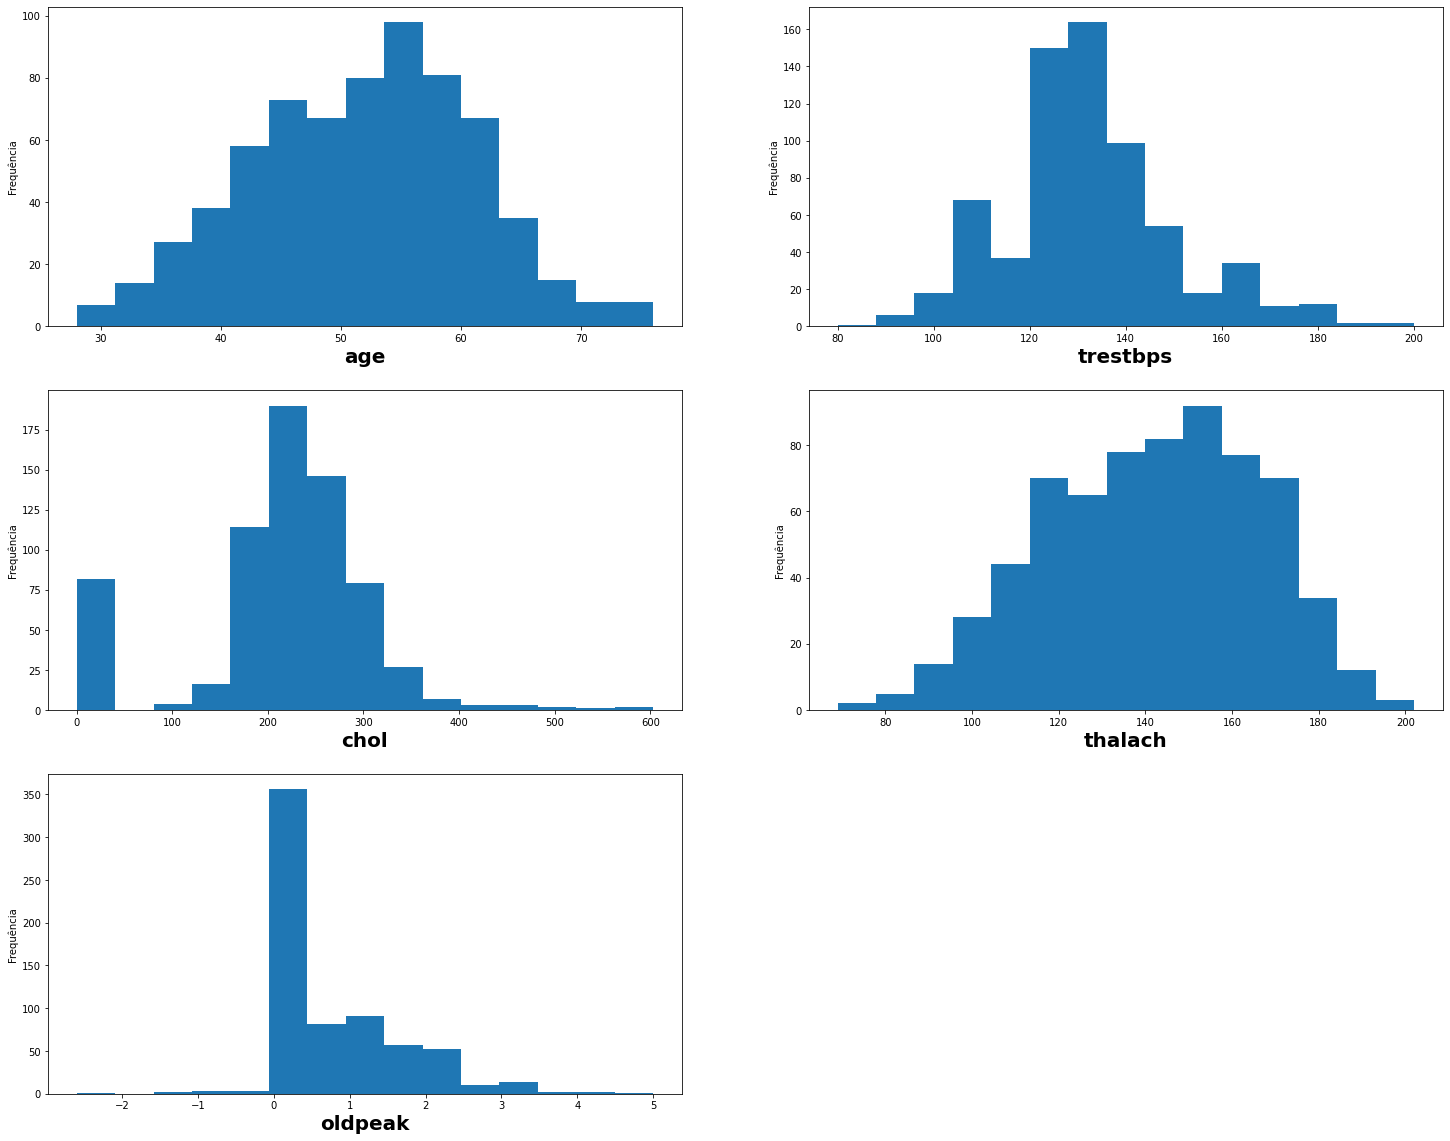

In [55]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(25,20))

counter = 0 

for i in range(3):
  for j in range(2):

    ax = axes[i][j]

    # Plotar somente quando houver dados
    if counter < len(colunas_numeric):

      ax.hist(ds_floats[colunas_numeric[counter]], bins=15)
      ax.set_xlabel(colunas_numeric[counter], fontsize = 20, fontweight = 'bold')
      ax.set_ylabel('Frequência')

    else:
      ax.set_axis_off()

    counter += 1

plt.show()

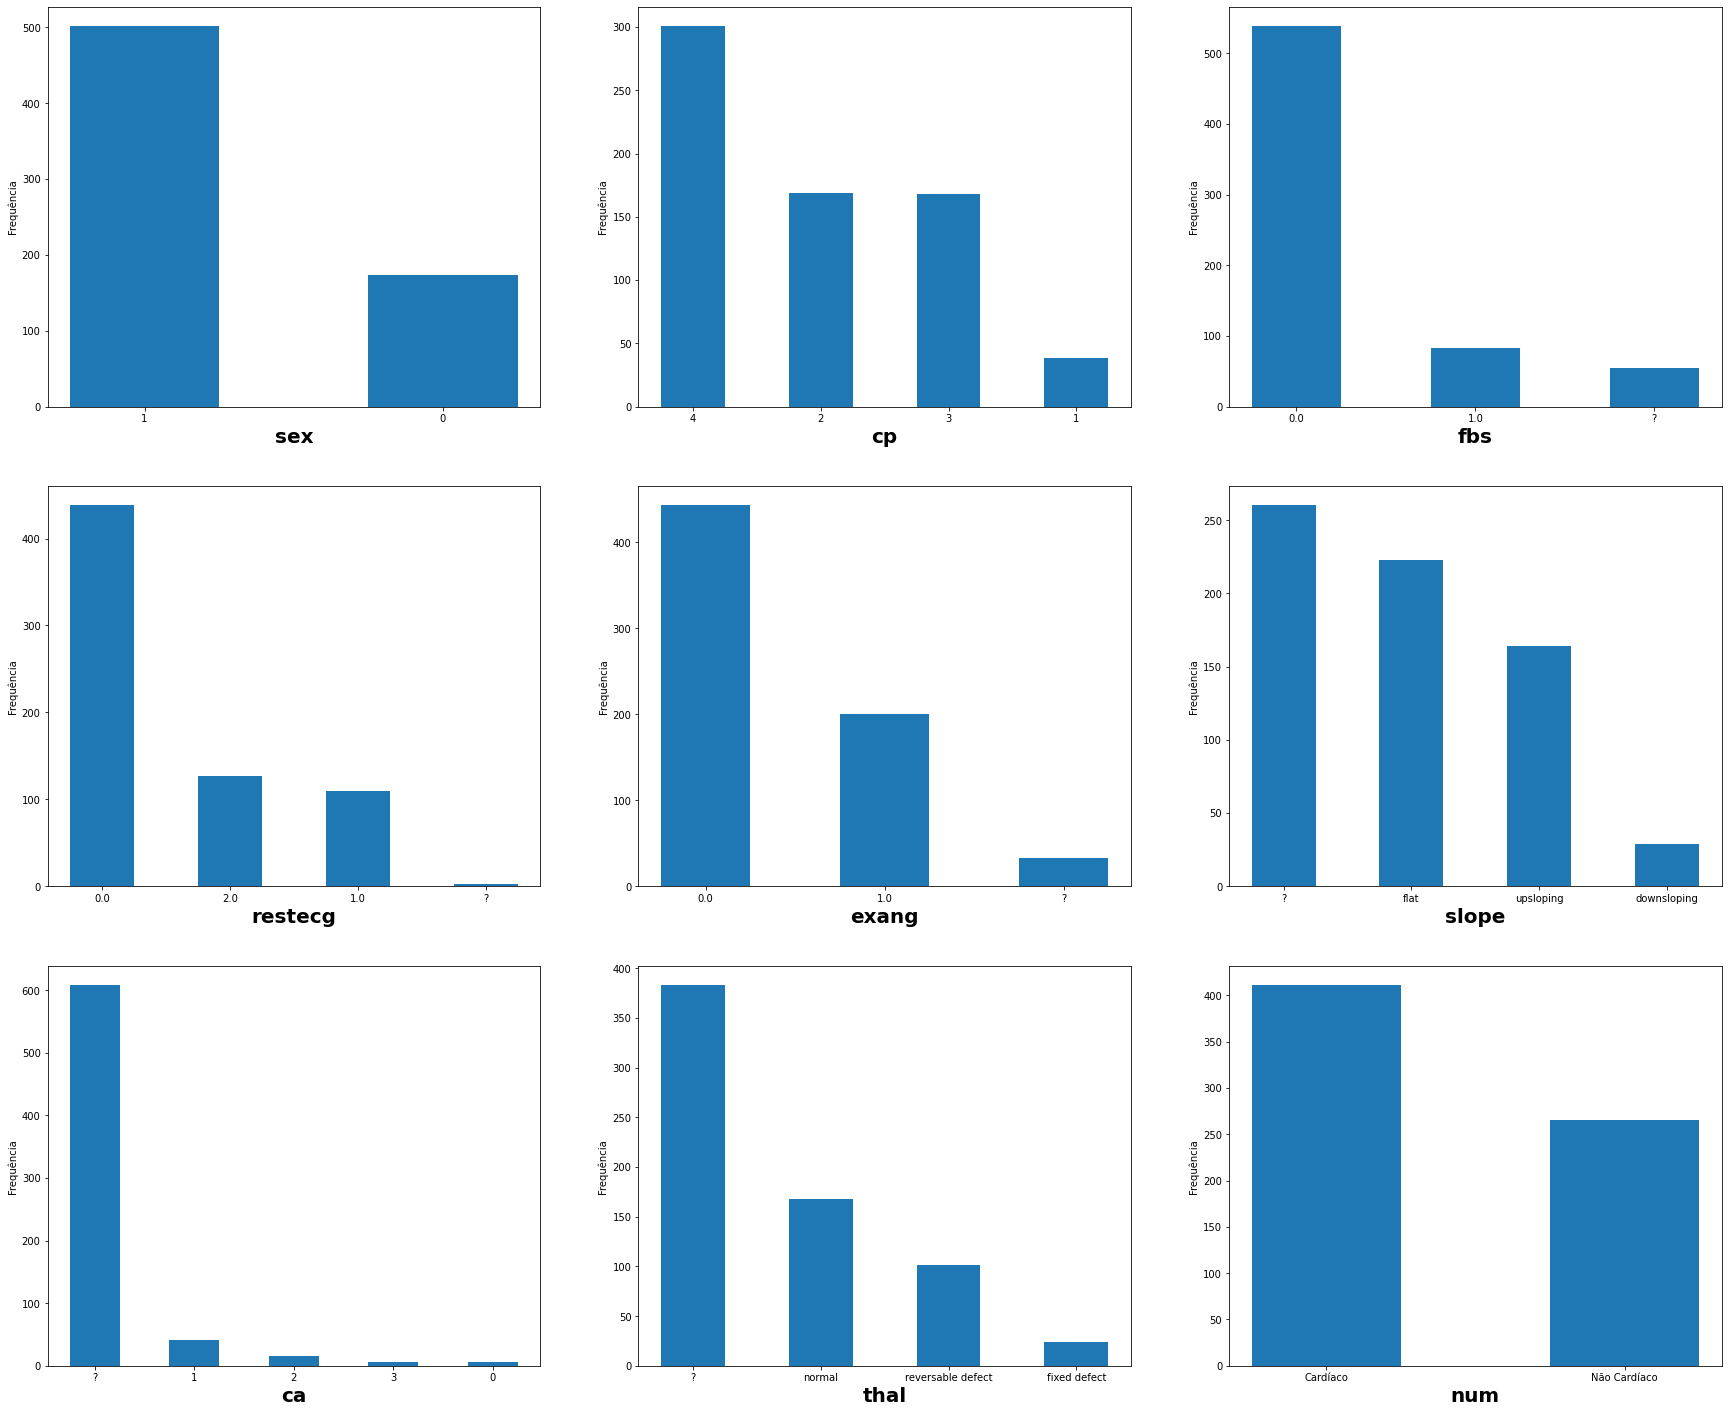

In [56]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(30,25))

counter = 0 

for i in range(3):
  for j in range(3):

    ax = axes[i][j]

    # Plotar somente quando houver dados
    if counter < len(colunas_categoric):
      alfa=ds_categoric[colunas_categoric[counter]].value_counts().keys().astype(str)
      beta=ds_categoric[colunas_categoric[counter]].value_counts()

      ax.bar(alfa,beta,width=0.5)
      ax.set_xlabel(colunas_categoric[counter], fontsize = 20, fontweight = 'bold')
      ax.set_ylabel('Frequência')

    else:
      ax.set_axis_off()

    counter += 1

plt.show()

p

In [57]:
# Exluindo linhas nulas do restecg
heart_db.drop(heart_db.loc[heart_db['restecg']=='?'].index, inplace=True)

In [58]:
heart_db.shape

(674, 11)

In [59]:
#substituindo os valores nulos de exang pela moda
a = heart_db['exang']=='?'
 
# selecting new value
b = 0
 
 
# replace values of one DataFrame
# with the value of another DataFrame
heart_db = heart_db.replace(a,b)

In [60]:
heart_db.drop(heart_db.loc[heart_db['fbs']=='?'].index, inplace=True)

In [61]:
heart_db.drop(heart_db.loc[heart_db['exang']=='?'].index, inplace=True)

In [62]:
heart_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588 entries, 1 to 918
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       588 non-null    int64  
 1   sex       588 non-null    int64  
 2   cp        588 non-null    int64  
 3   trestbps  588 non-null    float64
 4   chol      588 non-null    float64
 5   fbs       588 non-null    object 
 6   restecg   588 non-null    object 
 7   thalach   588 non-null    float64
 8   exang     588 non-null    object 
 9   oldpeak   588 non-null    float64
 10  num       588 non-null    object 
dtypes: float64(4), int64(3), object(4)
memory usage: 55.1+ KB


# Interpretando os dados

In [63]:
heart_db.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'num'],
      dtype='object')

In [64]:
df_categoric = heart_db.iloc[:,[1,2,5,6,8,10]]
df_floats = heart_db.iloc[:,[0,3,4,7,9,10]]
colunas_numeric=df_floats.columns
colunas_categoric=df_categoric.columns

In [65]:
colunas = list(heart_db.columns)

for x in colunas: 
  print(x,':', heart_db[x].unique())

age : [67 37 41 56 57 53 44 52 48 54 49 64 58 50 66 43 69 59 42 61 40 71 51 65
 60 46 62 45 39 47 63 34 35 29 55 70 68 74 76 38 30 31 32 33 36 28 73 75]
sex : [1 0]
cp : [4 3 2 1]
trestbps : [120. 130. 140. 172. 150. 110. 135. 160. 105. 124. 125. 142. 128. 155.
 104. 138. 108. 134. 122. 115. 118. 145. 100.  94. 170. 112. 102. 152.
 101. 132. 126. 174. 148. 178. 158. 192. 129. 180. 136. 146. 106. 156.
 154.  98. 190.  92. 200. 185.  96. 144. 114. 127.]
chol : [229.  250.  204.  236.  354.  203.  192.  294.  263.  199.  168.  239.
 275.  266.  211.  283.  284.  219.  340.  226.  247.  335.  234.  233.
 276.  243.  302.  212.  330.  175.  417.  197.  198.  177.  253.  172.
 273.  213.  216.  304.  185.  232.  231.  269.  267.  248.  360.  258.
 308.  245.  208.  264.  321.  325.  235.  257.  256.  141.  252.  255.
 201.  222.  260.  182.  303.  265.  309.  307.  249.  186.  183.  282.
 220.  209.  227.  261.  221.  288.  205.  240.  318.  298.  564.  322.
 299.  300.  277.  214.  207.  22

## Avaliandio os diagnósticos pelas variáveis categóricas

In [66]:
fig=px.imshow(pd.crosstab(heart_db['restecg'],heart_db["num"]).T,text_auto=True)
fig.update_layout(title='Condição'+" vs Diagnóstico", title_font_size=30,font_size=20,title_x=0.5,hoverlabel_font_size=20)
fig.show()

In [67]:
fig=px.imshow(pd.crosstab(heart_db['sex'],heart_db["num"]).T,text_auto=True)
fig.update_layout(title='Condição'+" vs Diagnóstico", title_font_size=30,font_size=20,title_x=0.5,hoverlabel_font_size=20)
fig.show()

In [68]:
fig=px.imshow(pd.crosstab(heart_db['cp'],heart_db["num"]).T,text_auto=True)
fig.update_layout(title='Condição'+" vs Diagnóstico", title_font_size=30,font_size=20,title_x=0.5,hoverlabel_font_size=20)
fig.show()

In [69]:
fig=px.imshow(pd.crosstab(heart_db['fbs'],heart_db["num"]).T,text_auto=True)
fig.update_layout(title='Condição'+" vs Diagnóstico", title_font_size=30,font_size=20,title_x=0.5,hoverlabel_font_size=20)
fig.show()

In [70]:
fig=px.imshow(pd.crosstab(heart_db['exang'],heart_db["num"]).T,text_auto=True)
fig.update_layout(title='Condição'+" vs Diagnóstico", title_font_size=30,font_size=20,title_x=0.5,hoverlabel_font_size=20)
fig.show()

## Avaliando os diagnósticos pelas variáveis numéricas

In [71]:
df_floats['num'].unique(), df_floats.columns

(array(['Não Cardíaco', 'Cardíaco'], dtype=object),
 Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'num'], dtype='object'))

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



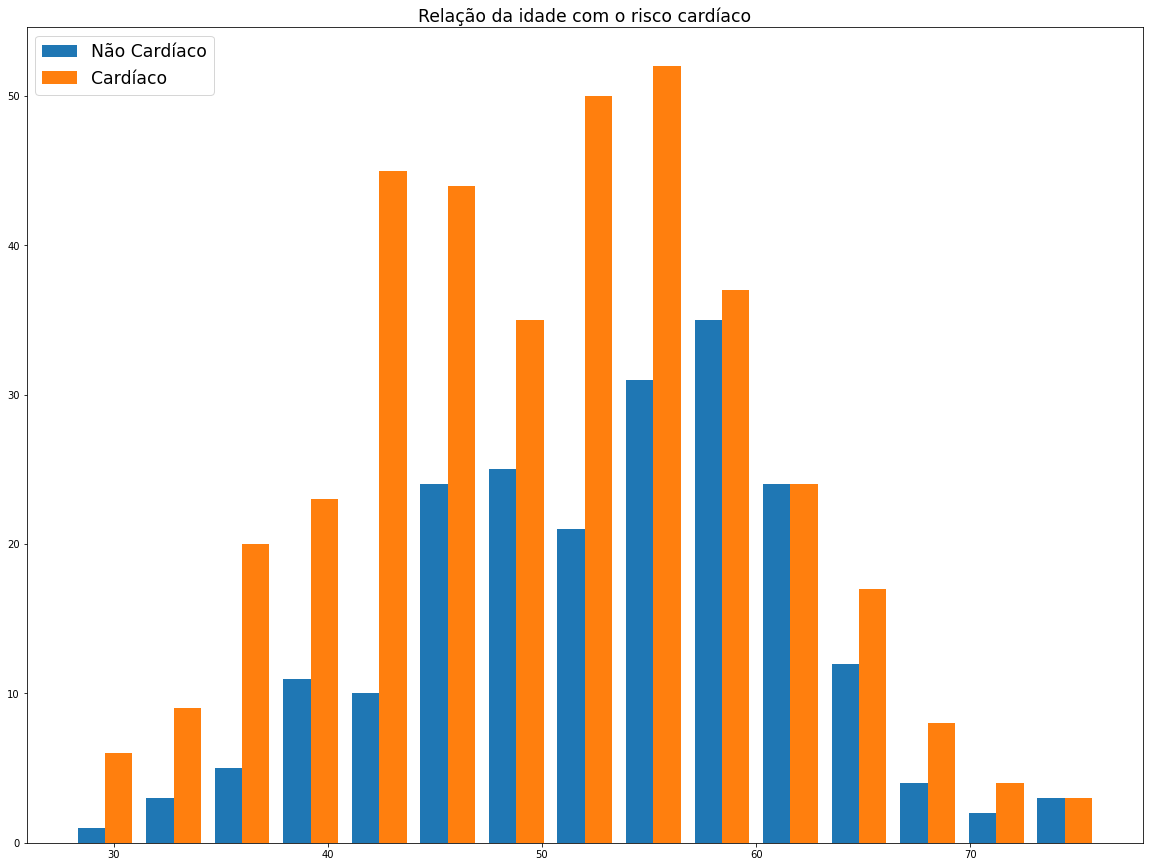

In [72]:
filtro_a=df_floats[df_floats['num']=='Não Cardíaco']
filtro_b=df_floats[df_floats['num']=='Cardíaco']
fig, ax = plt.subplots(figsize=(20,15))
plt.hist([filtro_a['age'],filtro_b['age']], bins=15,label=['Não Cardíaco','Cardíaco']);
plt.title("Relação da idade com o risco cardíaco",fontsize='xx-large');
plt.legend(loc='upper left', fontsize='xx-large');
plt.show;

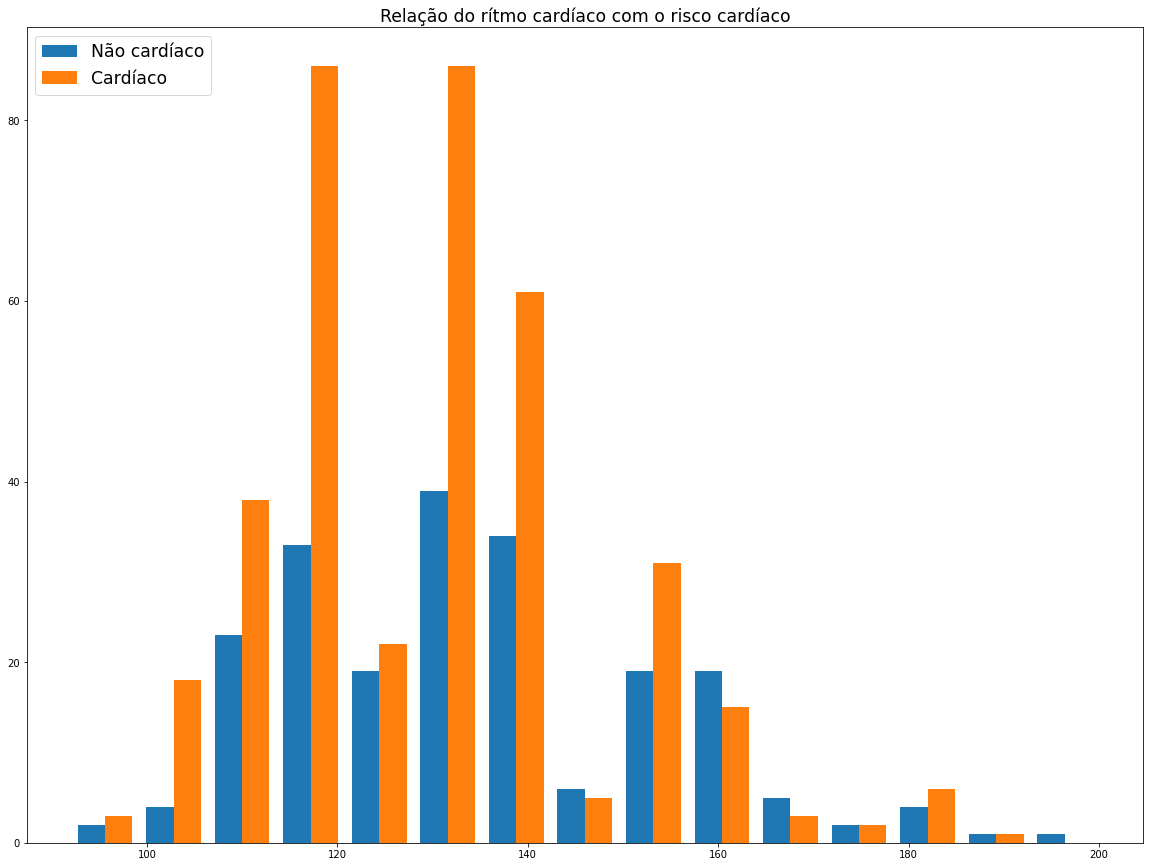

In [73]:
filtro_a=df_floats[df_floats['num']=='Não Cardíaco']
filtro_b=df_floats[df_floats['num']=='Cardíaco']
fig, ax = plt.subplots(figsize=(20,15))
plt.hist([filtro_a['trestbps'],filtro_b['trestbps']], bins=15,label=['Não cardíaco','Cardíaco'])
plt.title("Relação do rítmo cardíaco com o risco cardíaco",fontsize='xx-large')
plt.legend(loc='upper left', fontsize='xx-large')
plt.show;

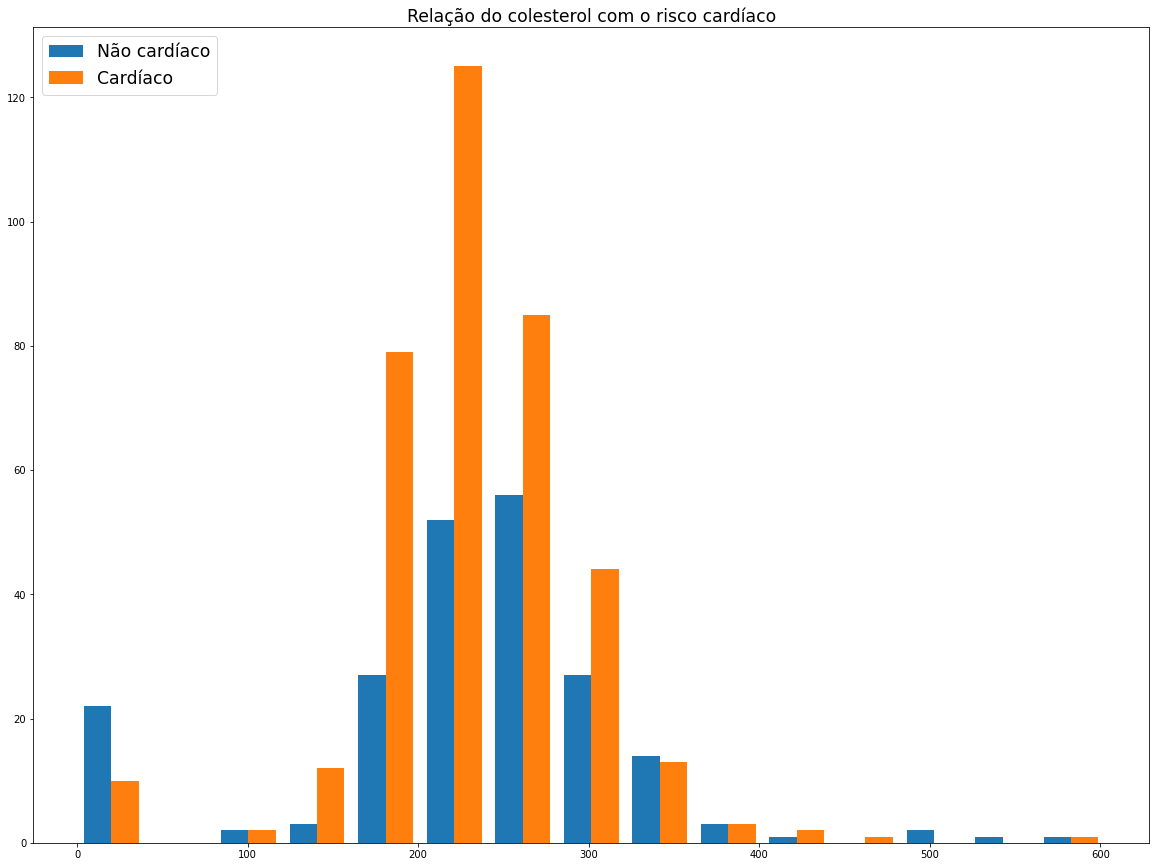

In [74]:
filtro_a=df_floats[df_floats['num']=='Não Cardíaco']
filtro_b=df_floats[df_floats['num']=='Cardíaco']
fig, ax = plt.subplots(figsize=(20,15))
plt.hist([filtro_a['chol'],filtro_b['chol']], bins=15,label=['Não cardíaco','Cardíaco'])
plt.title("Relação do colesterol com o risco cardíaco",fontsize='xx-large')
plt.legend(loc='upper left', fontsize='xx-large')
plt.show;

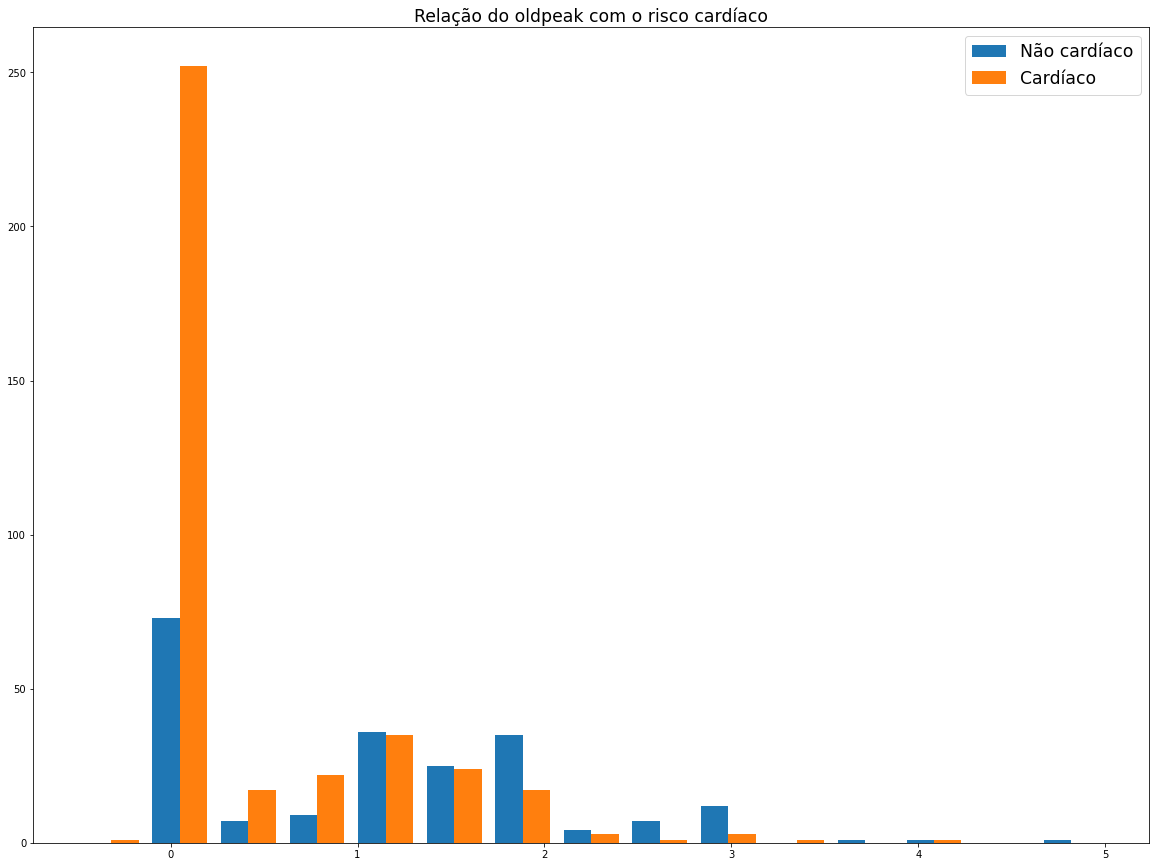

In [75]:
filtro_a=df_floats[df_floats['num']=='Não Cardíaco']
filtro_b=df_floats[df_floats['num']=='Cardíaco']
fig, ax = plt.subplots(figsize=(20,15))
plt.hist([filtro_a['oldpeak'],filtro_b['oldpeak']], bins=15,label=['Não cardíaco','Cardíaco'])
plt.title("Relação do oldpeak com o risco cardíaco",fontsize='xx-large')
plt.legend(loc='upper right', fontsize='xx-large')
plt.show;

In [76]:
len(colunas_numeric)

6

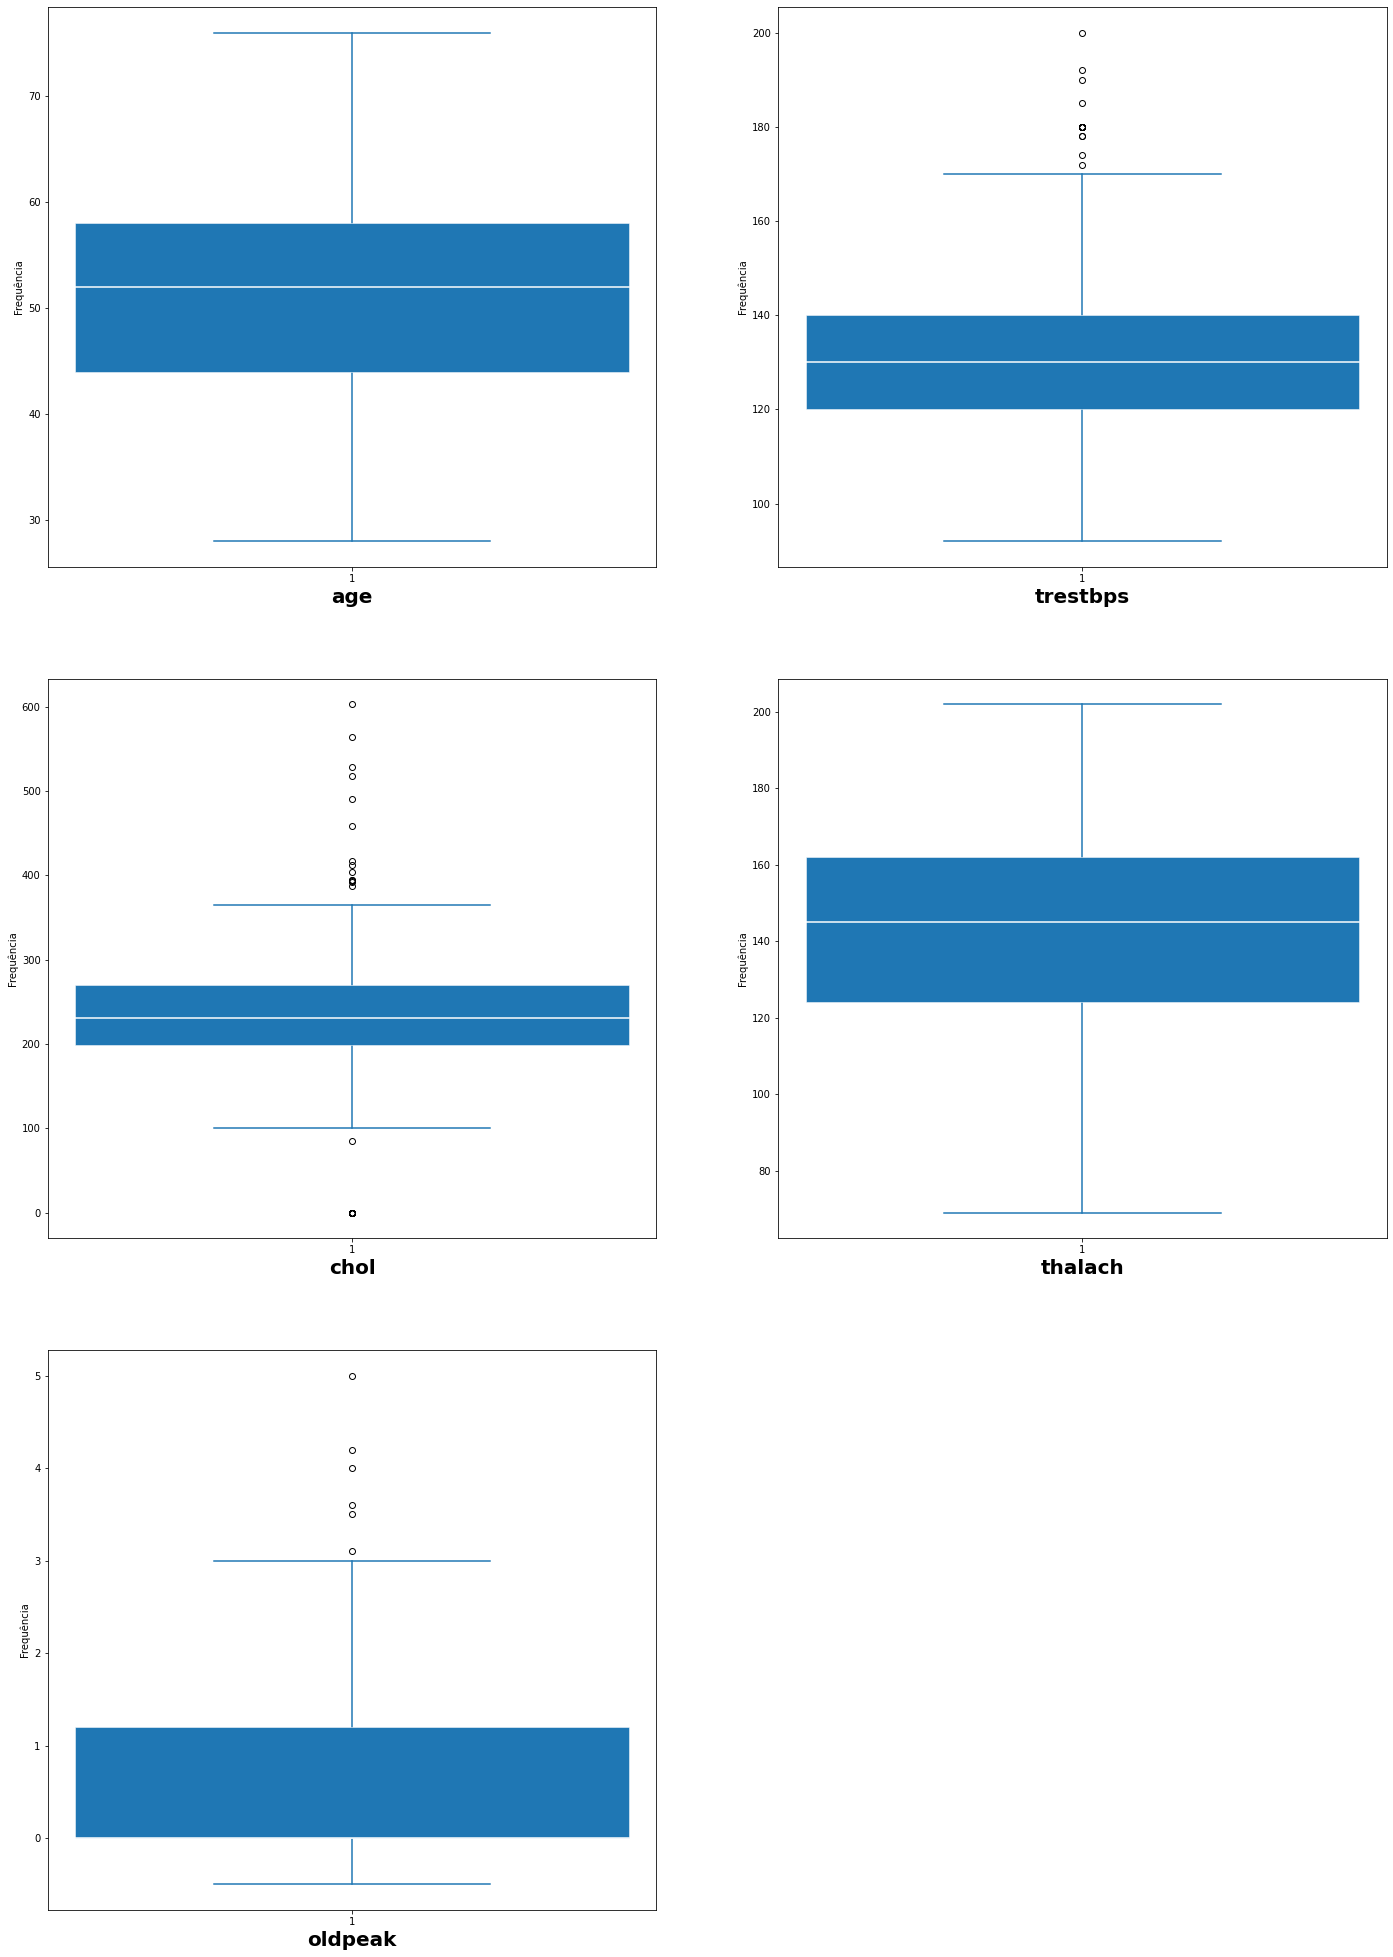

In [77]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(24,35))

counter = 0 

for i in range(3):
  for j in range(2):

    ax = axes[i][j]

    # Plotar somente quando houver dados
    if counter < 5:
      

      ax.boxplot(df_floats[colunas_numeric[counter]], widths=1.5, patch_artist=True,showmeans=False,medianprops={"color": "white", "linewidth": 1.5},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5})
      ax.set_xlabel(colunas_numeric[counter], fontsize = 20, fontweight = 'bold')
      ax.set_ylabel('Frequência')

    else:
      ax.set_axis_off()

    counter += 1

plt.show()

In [78]:
len

<function len(obj, /)>

# Processamento dos dados

In [79]:
df_floats = df_floats.iloc[:,[0,1,2,3,4]]

In [80]:
scaler_credit=StandardScaler()
df_floats=scaler_credit.fit_transform(df_floats)

In [81]:
df_categoric.head()

,sex,cp,fbs,restecg,exang,num
1,1,4,0.0,2.0,1.0,Não Cardíaco
2,1,3,0.0,0.0,0.0,Cardíaco
3,0,2,0.0,2.0,0.0,Cardíaco
4,1,2,0.0,0.0,0.0,Cardíaco
6,0,4,0.0,0.0,1.0,Cardíaco


Tipo de dor no peito. 
* 0: Assintomático
* 1: Isquemia atípica
* 2: Dor não anginosa
* 3: Isquemia típica

In [82]:
#df_categoric['sex'].replace([0,1],['female','male'], inplace=True)
#df_categoric['cp'].replace([1,2,3,4],['Assintomático','Isquemia atípica','Dor não anginosa','Isquemia típica'],inplace=True)
#df_categoric['restecg'].replace([0,1,2],['provavel ou definitiva hipertrofia','Ventriculo normal', 'Onda ST-T Normal'], inplace=True)
#df_categoric['exang'].replace([0,1],['Sem isquemia por exercício','Com isquemia por exercício'], inplace=True)
#df_categoric['fbs'].replace([0,1],['Abaixo de 120mg/ml','Acima de 120mg/ml'], inplace=True)

In [83]:
df_categoric.shape

(588, 6)

In [84]:
df_categoric.head()

,sex,cp,fbs,restecg,exang,num
1,1,4,0.0,2.0,1.0,Não Cardíaco
2,1,3,0.0,0.0,0.0,Cardíaco
3,0,2,0.0,2.0,0.0,Cardíaco
4,1,2,0.0,0.0,0.0,Cardíaco
6,0,4,0.0,0.0,1.0,Cardíaco


In [85]:
df_categoric['cp'].unique()

array([4, 3, 2, 1])

In [86]:
##from sklearn.preprocessing import LabelEncoder
#label_encoder_test = LabelEncoder()
#teste=label_encoder_test.fit_transform(df_categoric.iloc[:,1])
#teste

In [87]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
OHE_categoric=ColumnTransformer(transformers=[('OneHot',OneHotEncoder(),[0,1,2,3,4])], remainder='passthrough')

In [88]:
df_categoric=OHE_categoric.fit_transform(df_categoric)
df_categoric

array([[0.0, 1.0, 0.0, ..., 0.0, 1.0, 'Não Cardíaco'],
       [0.0, 1.0, 0.0, ..., 1.0, 0.0, 'Cardíaco'],
       [1.0, 0.0, 0.0, ..., 1.0, 0.0, 'Cardíaco'],
       ...,
       [0.0, 1.0, 0.0, ..., 0.0, 1.0, 'Não Cardíaco'],
       [1.0, 0.0, 0.0, ..., 1.0, 0.0, 'Não Cardíaco'],
       [0.0, 1.0, 0.0, ..., 0.0, 1.0, 'Não Cardíaco']], dtype=object)

In [89]:
display(df_categoric)

array([[0.0, 1.0, 0.0, ..., 0.0, 1.0, 'Não Cardíaco'],
       [0.0, 1.0, 0.0, ..., 1.0, 0.0, 'Cardíaco'],
       [1.0, 0.0, 0.0, ..., 1.0, 0.0, 'Cardíaco'],
       ...,
       [0.0, 1.0, 0.0, ..., 0.0, 1.0, 'Não Cardíaco'],
       [1.0, 0.0, 0.0, ..., 1.0, 0.0, 'Não Cardíaco'],
       [0.0, 1.0, 0.0, ..., 0.0, 1.0, 'Não Cardíaco']], dtype=object)

In [90]:
df_categoric[8]

array([0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0,
       'Cardíaco'], dtype=object)

In [91]:
df_categoric[0]

array([0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0,
       'Não Cardíaco'], dtype=object)

In [92]:
df_categoric.shape, df_floats.shape

((588, 14), (588, 5))

In [93]:
df_categoric=pd.DataFrame(df_categoric)

In [94]:
df_floats=pd.DataFrame(df_floats)

In [95]:
matriz = df_floats.merge(df_categoric,right_index=True,left_index=True, how='outer')
x_matriz=matriz.iloc[:,1:18]
x_matriz=x_matriz.values

In [96]:
y_matriz=matriz[13].values

In [97]:
len(x_matriz), len(y_matriz)

(588, 588)

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_treinamento, X_teste, y_treinamento,y_teste = train_test_split(x_matriz, y_matriz,test_size=0.3, random_state=0)

In [100]:
X_teste.shape

(177, 17)

In [101]:
import pickle

In [102]:
# Salvando a base de dados
with open('heart_desease.pkl',mode='wb') as f:
  pickle.dump([X_treinamento, X_teste, y_treinamento, y_teste],f)

In [103]:
# Abrindo a base de dados
with open('heart_desease.pkl','rb') as f:
  X_treinamento, X_teste, y_treinamento, y_teste=pickle.load(f)

# Construindo os modelos

## Naive bayse

In [104]:
from sklearn.naive_bayes import GaussianNB

In [105]:
naive_bayse=GaussianNB()
naive_bayse.fit(X_treinamento, y_treinamento)
previsoes=naive_bayse.predict(X_teste)
#Variáveis previstas
previsoes

array(['Não Cardíaco', 'Cardíaco', 'Não Cardíaco', 'Cardíaco', 'Cardíaco',
       'Cardíaco', 'Cardíaco', 'Cardíaco', 'Não Cardíaco', 'Não Cardíaco',
       'Cardíaco', 'Cardíaco', 'Cardíaco', 'Não Cardíaco', 'Cardíaco',
       'Cardíaco', 'Cardíaco', 'Cardíaco', 'Não Cardíaco', 'Cardíaco',
       'Não Cardíaco', 'Cardíaco', 'Cardíaco', 'Cardíaco', 'Não Cardíaco',
       'Não Cardíaco', 'Cardíaco', 'Cardíaco', 'Cardíaco', 'Cardíaco',
       'Cardíaco', 'Cardíaco', 'Não Cardíaco', 'Cardíaco', 'Cardíaco',
       'Não Cardíaco', 'Não Cardíaco', 'Cardíaco', 'Cardíaco',
       'Não Cardíaco', 'Cardíaco', 'Não Cardíaco', 'Não Cardíaco',
       'Cardíaco', 'Cardíaco', 'Cardíaco', 'Cardíaco', 'Não Cardíaco',
       'Cardíaco', 'Cardíaco', 'Cardíaco', 'Cardíaco', 'Cardíaco',
       'Não Cardíaco', 'Não Cardíaco', 'Cardíaco', 'Não Cardíaco',
       'Não Cardíaco', 'Não Cardíaco', 'Cardíaco', 'Cardíaco', 'Cardíaco',
       'Não Cardíaco', 'Não Cardíaco', 'Não Cardíaco', 'Cardíaco',
       'Cardía

In [106]:
# Previsões reais
y_teste

array(['Não Cardíaco', 'Não Cardíaco', 'Cardíaco', 'Cardíaco',
       'Não Cardíaco', 'Cardíaco', 'Não Cardíaco', 'Cardíaco',
       'Não Cardíaco', 'Não Cardíaco', 'Cardíaco', 'Cardíaco', 'Cardíaco',
       'Não Cardíaco', 'Cardíaco', 'Cardíaco', 'Cardíaco', 'Cardíaco',
       'Cardíaco', 'Cardíaco', 'Não Cardíaco', 'Cardíaco', 'Não Cardíaco',
       'Não Cardíaco', 'Cardíaco', 'Não Cardíaco', 'Cardíaco',
       'Não Cardíaco', 'Não Cardíaco', 'Cardíaco', 'Cardíaco', 'Cardíaco',
       'Não Cardíaco', 'Cardíaco', 'Cardíaco', 'Não Cardíaco',
       'Não Cardíaco', 'Cardíaco', 'Não Cardíaco', 'Não Cardíaco',
       'Cardíaco', 'Não Cardíaco', 'Não Cardíaco', 'Cardíaco', 'Cardíaco',
       'Cardíaco', 'Cardíaco', 'Cardíaco', 'Não Cardíaco', 'Cardíaco',
       'Não Cardíaco', 'Cardíaco', 'Cardíaco', 'Não Cardíaco',
       'Não Cardíaco', 'Cardíaco', 'Cardíaco', 'Cardíaco', 'Cardíaco',
       'Cardíaco', 'Cardíaco', 'Cardíaco', 'Não Cardíaco', 'Não Cardíaco',
       'Cardíaco', 'Cardíaco',

In [107]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

In [108]:
# O escalonamento das variáveis aperfeiçoa as previsões
round(accuracy_score(y_teste, previsoes),2)

0.8

0.7966101694915254

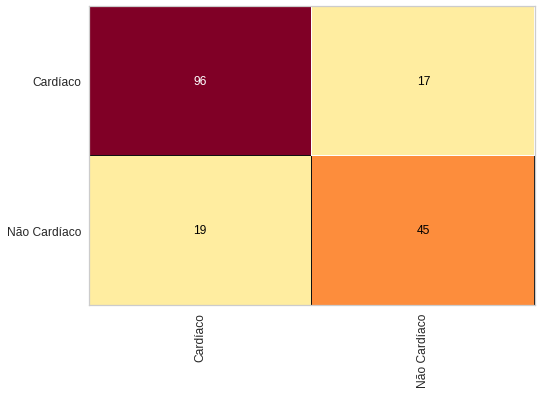

In [109]:
# Gerando a matriz de confusão
cm=ConfusionMatrix(naive_bayse)
cm.fit(X_treinamento, y_treinamento)
cm.score(X_teste, y_teste)

In [110]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

    Cardíaco       0.83      0.85      0.84       113
Não Cardíaco       0.73      0.70      0.71        64

    accuracy                           0.80       177
   macro avg       0.78      0.78      0.78       177
weighted avg       0.80      0.80      0.80       177



* Support: A quantidade de indivíduos da classe "Não cardíaco" possue metade dos dados da classe "cardíaco"
* Recall: O algorítmo identifica 70% dos pacientes não cardíaco e 85% dos pacientes cardíacos. 
* Precision: O grau de precisão é de que o algorítimo acerta 83 vezes os casos de risco cardíaco, e em 73 vezes os casos sem risco cardíaco.


## Decision tree

In [111]:
from sklearn.tree import DecisionTreeClassifier

In [112]:
# Criando a árvore de decisão
arvore_decisao=DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_decisao.fit(X_treinamento, y_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [113]:
#previsoes
previsoes=arvore_decisao.predict(X_teste)
previsoes

array(['Cardíaco', 'Cardíaco', 'Cardíaco', 'Cardíaco', 'Cardíaco',
       'Cardíaco', 'Cardíaco', 'Cardíaco', 'Não Cardíaco', 'Não Cardíaco',
       'Cardíaco', 'Cardíaco', 'Cardíaco', 'Não Cardíaco', 'Cardíaco',
       'Cardíaco', 'Cardíaco', 'Cardíaco', 'Cardíaco', 'Cardíaco',
       'Não Cardíaco', 'Cardíaco', 'Não Cardíaco', 'Cardíaco',
       'Não Cardíaco', 'Cardíaco', 'Cardíaco', 'Cardíaco', 'Não Cardíaco',
       'Cardíaco', 'Cardíaco', 'Cardíaco', 'Não Cardíaco', 'Cardíaco',
       'Cardíaco', 'Cardíaco', 'Não Cardíaco', 'Cardíaco', 'Cardíaco',
       'Não Cardíaco', 'Não Cardíaco', 'Não Cardíaco', 'Cardíaco',
       'Cardíaco', 'Cardíaco', 'Cardíaco', 'Cardíaco', 'Não Cardíaco',
       'Não Cardíaco', 'Não Cardíaco', 'Cardíaco', 'Cardíaco', 'Cardíaco',
       'Não Cardíaco', 'Não Cardíaco', 'Cardíaco', 'Não Cardíaco',
       'Não Cardíaco', 'Cardíaco', 'Cardíaco', 'Cardíaco', 'Cardíaco',
       'Não Cardíaco', 'Não Cardíaco', 'Cardíaco', 'Não Cardíaco',
       'Cardíaco', 'Ca

In [114]:
round(accuracy_score(y_teste, previsoes),2)

0.75

0.751412429378531

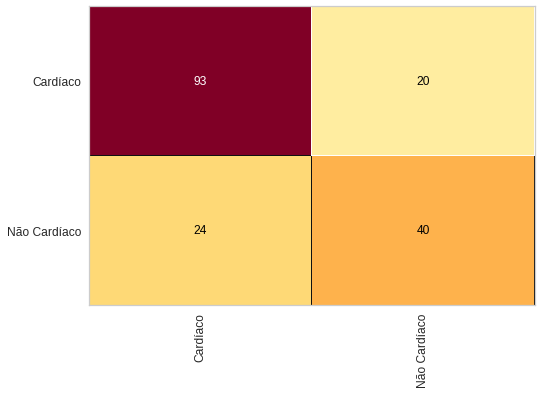

In [115]:
# Gerando a matriz de confusão
cm=ConfusionMatrix(arvore_decisao)
cm.fit(X_treinamento, y_treinamento)
cm.score(X_teste, y_teste)

In [116]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

    Cardíaco       0.79      0.82      0.81       113
Não Cardíaco       0.67      0.62      0.65        64

    accuracy                           0.75       177
   macro avg       0.73      0.72      0.73       177
weighted avg       0.75      0.75      0.75       177



In [117]:
arvore_decisao.feature_importances_

array([0.14081736, 0.2029168 , 0.18800218, 0.11661649, 0.04542406,
       0.01048849, 0.        , 0.00721426, 0.00978744, 0.16349193,
       0.01968152, 0.00712522, 0.0128814 , 0.01779822, 0.0160907 ,
       0.02060217, 0.02106176])

In [118]:
arvore_decisao.classes_

array(['Cardíaco', 'Não Cardíaco'], dtype=object)

In [119]:
matriz.columns

Index(['0_x', '1_x', '2_x', '3_x', '4_x', '0_y', '1_y', '2_y', '3_y', '4_y',
           5,     6,     7,     8,     9,    10,    11,    12,    13],
      dtype='object')

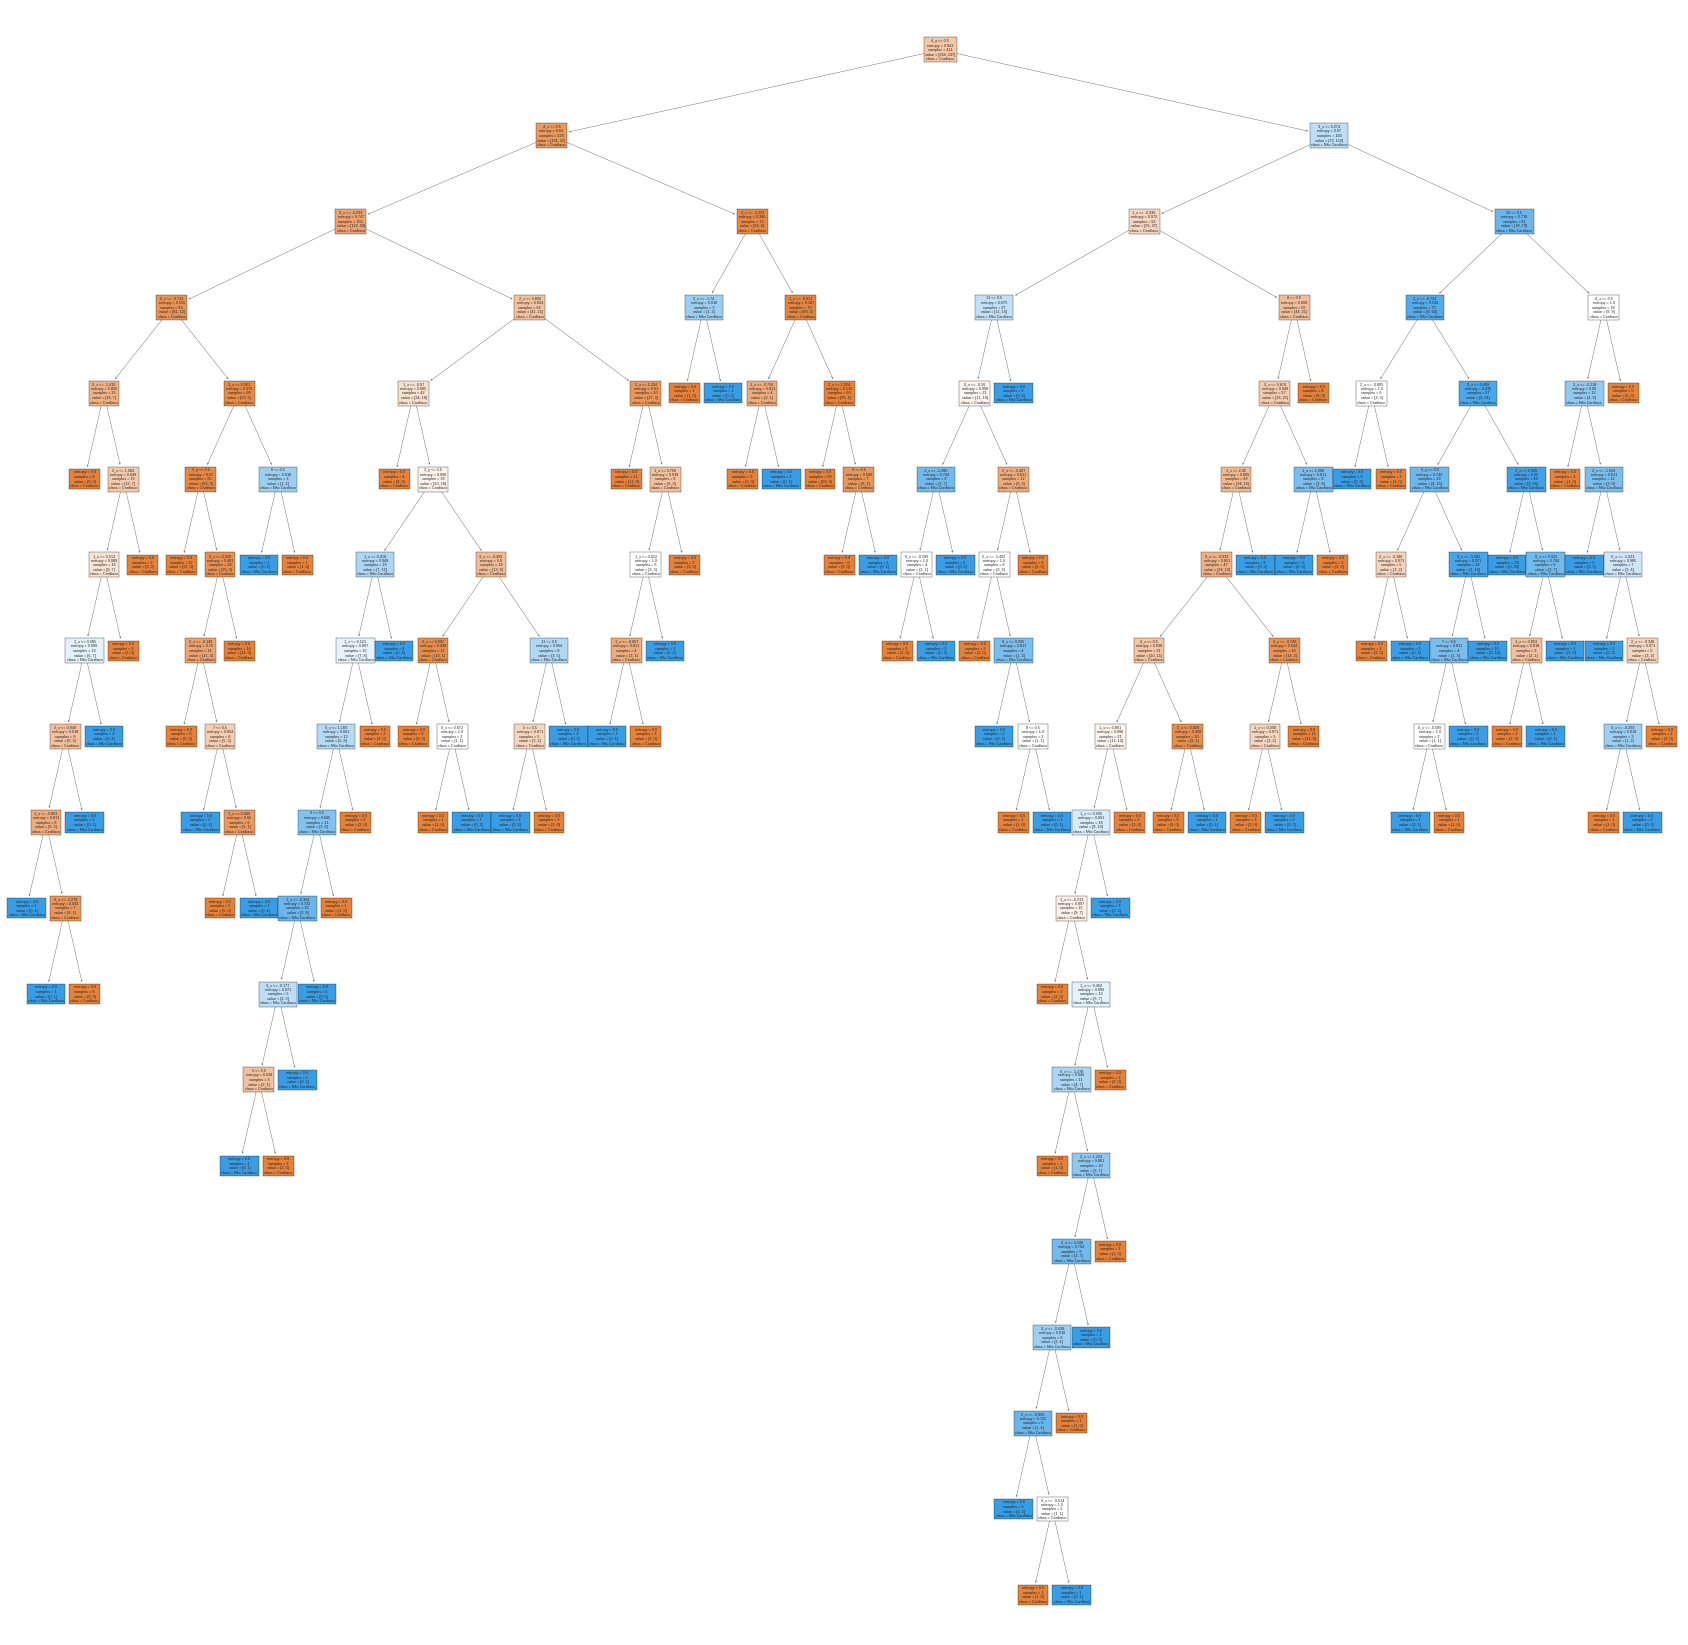

In [120]:
from sklearn import tree
previsores = ['0_x', '1_x', '2_x', '3_x', '4_x', '0_y', '1_y', '2_y', '3_y', '4_y',
           '5',     '6',     '7',     '8',     '9',    '10',    '11',    '12']
figura, eixos = plt.subplots(nrows = 1, ncols = 1, figsize=(30,30))
tree.plot_tree(arvore_decisao, feature_names=previsores, class_names = arvore_decisao.classes_, filled = True)
fig.savefig('arvore_decisao.png');

## Random forest

In [121]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
# Creating model
random_forest=RandomForestClassifier(n_estimators=45,criterion='entropy', random_state=0)
random_forest.fit(X_treinamento, y_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=45, random_state=0)

In [123]:
# Previsions
previsoes=random_forest.predict(X_teste)

In [124]:
accuracy_score(y_teste,previsoes)
#10=0.75
#40=0.79
#100=0.79

0.7966101694915254

0.7966101694915254

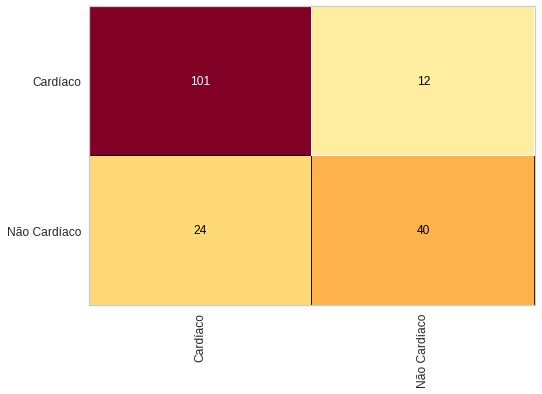

In [125]:
cm=ConfusionMatrix(random_forest)
cm.fit(X_treinamento,y_treinamento)
cm.score(X_teste, y_teste)

In [126]:
print(classification_report(y_teste,previsoes))

              precision    recall  f1-score   support

    Cardíaco       0.81      0.89      0.85       113
Não Cardíaco       0.77      0.62      0.69        64

    accuracy                           0.80       177
   macro avg       0.79      0.76      0.77       177
weighted avg       0.79      0.80      0.79       177



## Regressão Logistica 

In [127]:
from sklearn.linear_model import LogisticRegression

In [128]:
# Creating model
reg_log=LogisticRegression(random_state=0)
reg_log.fit(X_treinamento,y_treinamento)

LogisticRegression(random_state=0)

In [129]:
previsoes=reg_log.predict(X_teste)

In [130]:
reg_log.intercept_, reg_log.coef_

(array([-1.17983389]),
 array([[ 0.27218829,  0.20268967, -0.29785398,  0.43982462, -0.72914382,
          0.72906214,  0.08724131, -0.69095729, -0.33961525,  0.94324955,
          0.00566633, -0.00574801,  0.0032264 , -0.16052576,  0.15721768,
         -0.51316407,  0.51308238]]))

In [131]:
accuracy_score(y_teste,previsoes)

0.8022598870056498

0.8022598870056498

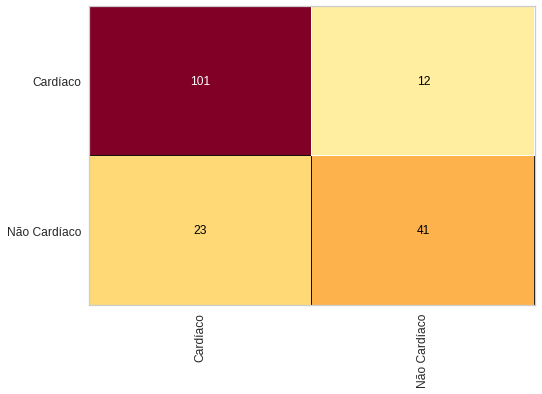

In [132]:
cm=ConfusionMatrix(reg_log)
cm.fit(X_treinamento,y_treinamento)
cm.score(X_teste, y_teste)

In [133]:
print(classification_report(y_teste,previsoes))

              precision    recall  f1-score   support

    Cardíaco       0.81      0.89      0.85       113
Não Cardíaco       0.77      0.64      0.70        64

    accuracy                           0.80       177
   macro avg       0.79      0.77      0.78       177
weighted avg       0.80      0.80      0.80       177



## Support Vector Machine

In [134]:
from sklearn.svm import SVC

In [135]:
# Creating and training the model
svm_model=SVC(kernel='rbf', random_state=1, C=1.0)
svm_model.fit(X_treinamento, y_treinamento)

SVC(random_state=1)

In [136]:
previsoes=svm_model.predict(X_teste)

In [137]:
accuracy_score(y_teste, previsoes)

0.807909604519774

0.807909604519774

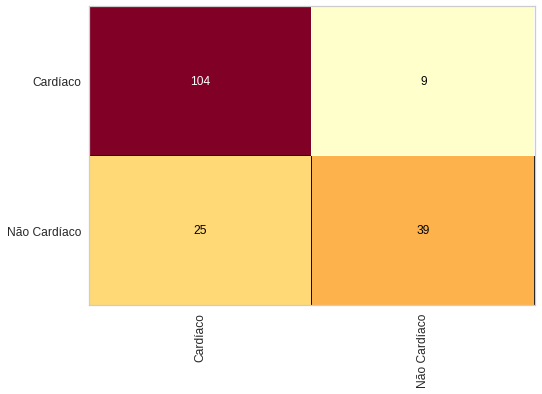

In [138]:
cm=ConfusionMatrix(svm_model)
cm.fit(X_treinamento,y_treinamento)
cm.score(X_teste, y_teste)

In [139]:
print(classification_report(y_teste,previsoes))

              precision    recall  f1-score   support

    Cardíaco       0.81      0.92      0.86       113
Não Cardíaco       0.81      0.61      0.70        64

    accuracy                           0.81       177
   macro avg       0.81      0.76      0.78       177
weighted avg       0.81      0.81      0.80       177



## Baseado em instância (Knn)

# Tuning dos parâmetros

In [140]:
from sklearn.model_selection import GridSearchCV

In [141]:
features = np.concatenate((X_treinamento,X_teste),axis=0)

In [142]:
targets=np.concatenate((y_treinamento,y_teste), axis=0)

## Decision Tree

In [143]:
parametros={'criterion':['gini','entropy'],
            'splitter': ['best','random'],
            'min_samples_split':[2,5,10],
            'min_samples_leaf':[1,5,10]}

In [144]:
grid_search=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=parametros)
grid_search.fit(features, targets)
melhores_parametros=grid_search.best_params_
melhor_resultado=grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 10, 'min_samples_split': 2, 'splitter': 'random'}
0.7790670722874112


## Random Forest

In [145]:
parametros={'criterion':['gini','entropy'],
            'n_estimators': [10,40, 100, 150],
            'min_samples_split':[2,5,10],
            'min_samples_leaf':[1,5,10]}

In [146]:
grid_search=GridSearchCV(estimator=RandomForestClassifier(),param_grid=parametros)
grid_search.fit(features, targets)
melhores_parametros=grid_search.best_params_
melhor_resultado=grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'gini', 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 100}
0.8010864841373315


## Knn classifier

## Regressão logística

In [147]:
parametros = {'tol':[0.0001,0.00001,0.000001],
              'C':[1.0,1.5,2.0],
              'solver':['lbfgs','sag','saga']}

In [148]:
grid_search=GridSearchCV(estimator=LogisticRegression(),param_grid=parametros)
grid_search.fit(features, targets);
melhores_parametros=grid_search.best_params_;
melhor_resultado=grid_search.best_score_;
print(melhores_parametros)
print(melhor_resultado)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn

{'C': 1.5, 'solver': 'lbfgs', 'tol': 0.0001}
0.7857163552078807


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [149]:
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.5, 'solver': 'lbfgs', 'tol': 0.0001}
0.7857163552078807


## SVM

In [150]:
parametros = {'tol':[0.0001,0.00001,0.000001],
              'C':[1.0,1.5,2.0],
              'kernel':['rbf','linear','poly','sigmoid'],
              'random_state':[1,2,3]}

In [151]:
grid_search=GridSearchCV(estimator=SVC(),param_grid=parametros)
grid_search.fit(features, targets);
melhores_parametros=grid_search.best_params_;
melhor_resultado=grid_search.best_score_;
print(melhores_parametros)
print(melhor_resultado)

{'C': 2.0, 'kernel': 'rbf', 'random_state': 1, 'tol': 0.0001}
0.7857453281182095


# Validação cruzada

In [152]:
from sklearn.model_selection import cross_val_score, KFold

In [153]:
resultado_arvore=[]
resultado_random=[]
resultado_regressao_logistica=[]
resultado_SVM=[]

for i in range(30):
  Kfold=KFold(n_splits=10, shuffle=True, random_state=i)

  arvore=DecisionTreeClassifier(criterion='entropy', min_samples_leaf= 10, min_samples_split= 10, splitter='random')
  scores=cross_val_score(arvore,features, targets, cv=Kfold)
  resultado_arvore.append(scores.mean())

  random=RandomForestClassifier(criterion= 'entropy', min_samples_leaf= 5, min_samples_split= 2, n_estimators= 150)
  scores=cross_val_score(arvore,features, targets, cv=Kfold)
  resultado_random.append(scores.mean())

  logistica=LogisticRegression(C= 1.5, solver= 'lbfgs', tol=0.0001)
  scores=cross_val_score(arvore,features, targets, cv=Kfold)
  resultado_regressao_logistica.append(scores.mean())

  svm=SVC(C= 2.0, kernel= 'rbf',tol= 0.0001)
  scores=cross_val_score(arvore,features, targets, cv=Kfold)
  resultado_SVM.append(scores.mean())

In [154]:
resultados=pd.DataFrame({'Arvore':resultado_arvore,'Random_forest':resultado_random,'Regressao_logistica':resultado_regressao_logistica,'SVM':resultado_SVM })
resultados

,Arvore,Random_forest,Regressao_logistica,SVM
0,0.782408,0.772268,0.773933,0.780801
1,0.778843,0.780538,0.778843,0.780655
2,0.778960,0.792577,0.775599,0.770427
3,0.792694,0.773963,0.785798,0.773963
4,0.772297,0.784249,0.780713,0.762127
5,0.770602,0.780771,0.763647,0.779047
6,0.753302,0.751578,0.761777,0.761777
7,0.775453,0.772005,0.773700,0.777148
8,0.770456,0.792577,0.765400,0.780713
9,0.760169,0.765254,0.761894,0.768703


In [155]:
len(resultado_arvore), len(resultado_random), len(resultado_regressao_logistica), len(resultado_SVM)

(30, 30, 30, 30)

In [156]:
resultados.describe()

,Arvore,Random_forest,Regressao_logistica,SVM
count,30.000000,30.000000,30.000000,30.000000
mean,0.776834,0.778257,0.776045,0.774570
std,0.008314,0.010703,0.008363,0.007476
min,0.753302,0.751578,0.761777,0.755172
25%,0.772231,0.772691,0.772538,0.770383
50%,0.778857,0.780567,0.774766,0.776973
75%,0.782357,0.783730,0.780691,0.780216
max,0.792694,0.795909,0.793863,0.785681


In [157]:
# Observação da variância 
resultados.var()

Arvore                 0.000069
Random_forest          0.000115
Regressao_logistica    0.000070
SVM                    0.000056
dtype: float64

In [158]:
# Coeficiente de variância. 
(resultados.std()/resultados.mean())*100

Arvore                 1.070180
Random_forest          1.375307
Regressao_logistica    1.077590
SVM                    0.965190
dtype: float64

# Testanto a normalidade dos dados

In [159]:
alpha=0.05

In [160]:
from scipy.stats import shapiro

In [161]:
shapiro(resultado_arvore), shapiro(resultado_random), shapiro(resultado_regressao_logistica), shapiro(resultado_SVM)
# Os resultados com valores menores do que o alpha não tem distribuição normal.

(ShapiroResult(statistic=0.9557983875274658, pvalue=0.241022989153862),
 ShapiroResult(statistic=0.9393790364265442, pvalue=0.0875234454870224),
 ShapiroResult(statistic=0.9626469016075134, pvalue=0.36132216453552246),
 ShapiroResult(statistic=0.935996949672699, pvalue=0.07099506258964539))

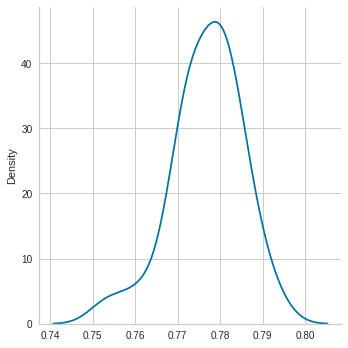

In [162]:
sns.displot(resultado_arvore, kind='kde');

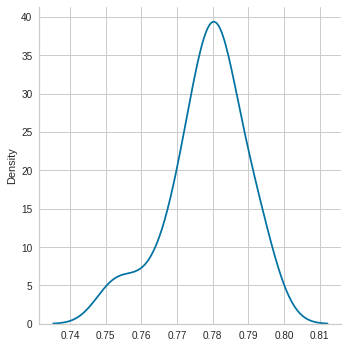

In [163]:
sns.displot(resultado_random,kind='kde');

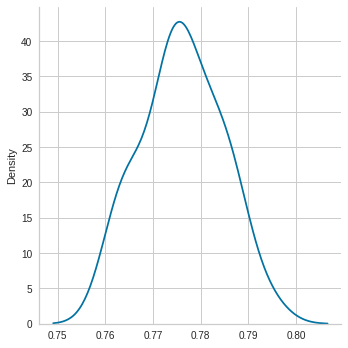

In [164]:
sns.displot(resultado_regressao_logistica,kind='kde');

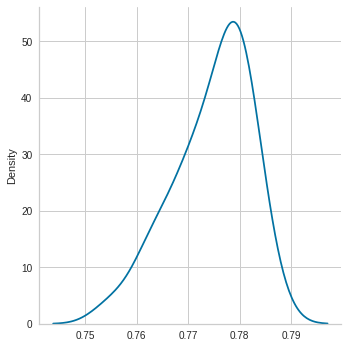

In [165]:
sns.displot(resultado_SVM,kind='kde');

# Teste ANOVA e Tukey

In [166]:
from scipy.stats import f_oneway

In [167]:
p = f_oneway(resultado_arvore, resultado_random,resultado_regressao_logistica,resultado_SVM)

In [168]:
type(p)

scipy.stats.stats.F_onewayResult

In [169]:
if p[1]<= alpha:
  print('Hipótese nula rejeitada. Dados são diferentes')
else:
  print('Hipótese alternativa regeitada. Os dados são iguais')

Hipótese alternativa regeitada. Os dados são iguais


In [170]:
resultaodos_algoritmos={'accuracy':np.concatenate([resultado_arvore, resultado_random,resultado_regressao_logistica,resultado_SVM]),
                        'algoritmo': ['arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore',
                                      'arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore',
                                      'arvore','arvore','random','random','random','random','random','random','random','random','random','random','random','random','random','random','random',
                                      'random','random','random','random','random','random','random','random','random','random','random','random','random','random','random',
                                      'logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica',
                                      'logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica',
                                      'logistica','logistica','logistica','logistica','logistica','logistica','logistica','svm','svm','svm','svm','svm','svm','svm','svm','svm',
                                      'svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm']}



In [171]:
resultados_df=pd.DataFrame(resultaodos_algoritmos)

In [172]:
resultados_df

,accuracy,algoritmo
0,0.782408,arvore
1,0.778843,arvore
2,0.778960,arvore
3,0.792694,arvore
4,0.772297,arvore
...,...,...
115,0.763472,svm
116,0.770368,svm
117,0.776943,svm
118,0.778989,svm


In [173]:
from statsmodels.stats.multicomp import MultiComparison

In [174]:
compara_algoritmos=MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])

In [175]:
teste_estatistico=compara_algoritmos.tukeyhsd()

In [176]:
print(teste_estatistico)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj   lower  upper  reject
---------------------------------------------------------
   arvore logistica  -0.0008    0.9 -0.0067 0.0051  False
   arvore    random   0.0014    0.9 -0.0045 0.0073  False
   arvore       svm  -0.0023 0.7267 -0.0082 0.0037  False
logistica    random   0.0022 0.7394 -0.0037 0.0081  False
logistica       svm  -0.0015    0.9 -0.0074 0.0044  False
   random       svm  -0.0037 0.3704 -0.0096 0.0022  False
---------------------------------------------------------


In [177]:
resultados.mean()

Arvore                 0.776834
Random_forest          0.778257
Regressao_logistica    0.776045
SVM                    0.774570
dtype: float64

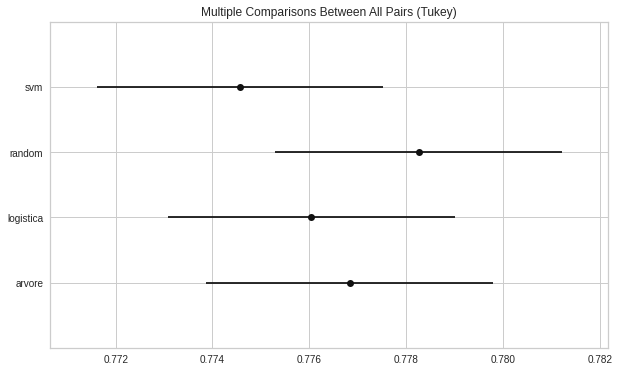

In [178]:
teste_estatistico.plot_simultaneous();

# Salvando os parâmetros em memória

In [195]:
arvore=DecisionTreeClassifier(criterion='entropy', min_samples_leaf= 10, min_samples_split= 10, splitter='random')
arvore.fit(features, targets)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10,
                       min_samples_split=10, splitter='random')

In [196]:
random=RandomForestClassifier(criterion= 'entropy', min_samples_leaf= 5, min_samples_split= 2, n_estimators= 150)
random.fit(features, targets)

RandomForestClassifier(criterion='entropy', min_samples_leaf=5,
                       n_estimators=150)

In [197]:
logistica=LogisticRegression(C= 1.5, solver= 'lbfgs', tol=0.0001)
logistica.fit(features, targets)

LogisticRegression(C=1.5)

In [198]:
svm=SVC(C= 2.0, kernel= 'rbf',tol= 0.0001)
svm.fit(features, targets)

SVC(C=2.0, tol=0.0001)

In [199]:
# Salvando modelos
pickle.dump(arvore, open('decision_tree.sav','wb'))
pickle.dump(random, open('random_forest.sav','wb'))
pickle.dump(logistica, open('logistic_regressor.sav','wb'))
pickle.dump(svm, open('svm.sav','wb'))

In [200]:
# Abrindo modelos
pickle.dump(arvore, open('decision_tree.sav','wb'))
pickle.dump(random, open('random_forest.sav','wb'))
pickle.dump(logistica, open('logistic_regressor.sav','wb'))
pickle.dump(svm, open('svm.sav','wb'))

In [185]:
novo_registro = features[23]
novo_registro=novo_registro.reshape(1,-1)
novo_registro.shape

(1, 17)

# Combinando classificadores

In [204]:
resultado_arvore=arvore.predict(novo_registro)
resultado_arvore

array(['Cardíaco'], dtype=object)

In [205]:
resultado_random=random.predict(novo_registro)

In [206]:
resultado_logistica=logistica.predict(novo_registro)

In [207]:
resultado_svm=svm.predict(novo_registro)

In [227]:
def heart_diagnostic(dados):
  com_risco=0
  sem_risco=0
  if resultado_arvore[0] == 'Cardíaco':
    com_risco+=1
  else:
    sem_risco+=1

  if resultado_random[0] == 'Cardíaco':
    com_risco+=1
  else:
    sem_risco+=1

  if resultado_logistica[0] == 'Cardíaco':
    com_risco+=1
  else:
    sem_risco+=1

  if resultado_svm[0] == 'Cardíaco':
    com_risco+=1
  else:
    sem_risco+=1

  print('---------------xxxx---------------')
  print('Arvore de decisão: ', (resultado_arvore))
  print('Random forest: ', (resultado_random))
  print('Regressão logistica: ', (resultado_logistica))
  print('SVM: ', (resultado_svm))
  print('~~~~~~~~~~~~  Resultado  ~~~~~~~~~~')
  if com_risco>sem_risco:
    print("Paciente com risco de doença cardíaca")
  if sem_risco>com_risco:
    print("Paciente sem risco de doença cardíaca")
  if com_risco == sem_risco: 
    print('Risco não definido')
  print('---------------xxxx---------------')

In [228]:
heart_diagnostic(features[12])

---------------xxxx---------------
Arvore de decisão:  ['Cardíaco']
Random forest:  ['Cardíaco']
Regressão logistica:  ['Cardíaco']
SVM:  ['Cardíaco']
~~~~~~~~~~~~  Resultado  ~~~~~~~~~~
Paciente com risco de doença cardíaca
---------------xxxx---------------
